In [1]:
## Python dependencies 
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import pandas as pd

In [2]:
# My Dependencies
from Samples.Data      import Data
from Plotter.Helper    import Helper
from Plotter.Plotter   import Plotter
from Cuts.Cuts         import Cuts

Welcome to JupyROOT 6.18/04


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:34: RuntimeWarning: ROOT 6.18/04 is currently active but you installed root_numpy against ROOT 6.05/02. Please consider reinstalling root_numpy for this ROOT version.
  RuntimeWarning)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.15.0 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
from scipy.integrate import simps
import array

from root_pandas import read_root 

# External Dependencies
from ROOT import TFile, TTree

In [4]:
import os, datetime

In [5]:
def dirStructure(figpath):
    date = datetime.datetime.now()
    fileName = str(date.year) + str(date.month) + str(date.day) + "/"
    
    try:
        os.mkdir(figpath+fileName)    
    except:
        print("Directory "+fileName+ " already exist")

    
    dirSubStructure(figpath + fileName + "Stacked/")
    dirSubStructure(figpath + fileName + "Unstacked/")
    
    dirSubStructure(figpath + fileName + "nJets/")
    for i in range(5):
        dirSubStructure(figpath + fileName + "nJets/Stacked_nJets"+str(i)+"/")
        dirSubStructure(figpath + fileName + "nJets/Unstacked_nJets"+str(i)+"/")
    
    return figpath+fileName  

def dirSubStructure(path):
    try:
        os.mkdir(path)
    except:
        print("Subdirectory for " + path + " already exists or failed.")
    
    try:
        os.mkdir(path+"log")
        os.mkdir(path+"log/Mult")
        os.mkdir(path+"linear")
        os.mkdir(path+"linear/Mult")
    except:
        print("Subdirectory for " + path + " already exists or failed.")

# Analysis

In [6]:
selection = 'mumug'
#selection = 'elelg'
#selection = 'ee'

#era = "2016"
era = "2017"

if selection == "mumug" or selection == "elelg":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        #SampleSet = 'V2_puWeight_phID'
        #SampleSet = 'V4_phID_isConv'
        #SampleSet = 'V4_phID_isConv_MINUIT'
        SampleSet = 'V6_lPhoton'
        
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt','genPhotonEta','genPhotonPhi',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets',#'nTaus','nBJets',
            'passElectronVeto',
            ]
elif selection == "ee":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'    
    
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 
            #'eventWeight','puWeight',
            'genWeight','triggerWeight','photonIDWeight',
            #'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneCharge',
            #'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoCharge',
            #'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneEta',
            #'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            #'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            #'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            #'photonOneScEtaWidth','photonOneScPhiWidth',
            #'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            #'genPhotonPt',
            #'vetoDY','genIsoPass',
            #'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            #'nMuons','nElectrons','nTaus','nPhotons','nJets','nBJets',
            #'ProbeIDPass','ProbeISOPass','ProbeWorstPass','ProbeSigPass','ProbeIsConv',
            ]
path    = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+era+"/"+DataGen+"/"+selection+"/"
pathSelections = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/Reduced"

figpath = dirStructure(figpath)


Help    = Helper(era)
Help.figpath = figpath
Plotter = Plotter(Help=Help)
Plotter.SetFig(Help.figpath)
Cut = Cuts()

Directory 2020213/ already exist
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/Stacked_nJets0/ already exists or failed.
Subdi

# High Level Functions

In [7]:
def Single_Ploting(Plotter,
                   data,
                   stacked,
                   log,
                   weightCorrection = True,
                   Blind            = True, 
                   Plotting         = True,
                   StatInclude      = False,
                  ):
    #################################################################
    #var = ['nPV','nJets','nBJets','nMuons','nPhotons','met']
    #var = ['nJets','nBJets','nMuons','nPhotons','met']
    var = ['nJets','nMuons','nPhotons','met']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot(
                    data,
                    v,
                    part             = '',
                    signalInclude    = True,
                    stacked          = stacked,
                    density          = density,
                    log              = log,
                    weightCorrection = weightCorrection,
                    Blind            = Blind,
                    Plotting         = Plotting,
                    StatInclude      = StatInclude,
                    )
        
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne','leptonOne_EE','leptonOne_EB',
            'leptonTwo','leptonTwo_EE','leptonTwo_EB',
            'photonOne','photonOne_EE','photonOne_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'llg','llg_EE','llg_EB',
           ]
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )   
            
    #################################################################
    var = ['DPhi','DEta','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB',
            'l2Photon','l2Photon_EE','l2Photon_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB',
            ]    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )            
    #################################################################            
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )              
    #################################################################            
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )        
            
    #################################################################            
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )        
    #################################################################            
    var = ['E2x2','E5x5','ScEtaWidth','ScPhiWidth','ScRawE','ScBrem','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )                    

In [8]:
def Multi_Ploting(Plotter,
                  data,
                  stacked,
                  log,
                  density          = False,
                  customRange      = False,
                  weightCorrection = True,
                  Blind            = True,
                  Plotting         = True,
                  StatInclude      = False,
                 ):
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne','leptonTwo','photonOne_EE','dilepton','llg','photonOne_EB']

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [2,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['DEta','DPhi','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB','l2Photon','l2Photon_EE','l2Photon_EB','dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB','dilepton']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [4,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )    
    #################################################################
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [3,1],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [3,1],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['M']    
    part = ['dilepton','dilepton_EE','dilepton_EB','llg','llg_EE','llg_EB']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [2,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################        
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB'] 
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['E2x2','E5x5','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['ScEtaWidth','ScPhiWidth','ScRawE','ScBrem']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )

# CSV files

In [9]:
def CSV_Files(figpath,Print=False):
    part = ['leptonOne','leptonTwo','dilepton','llg']
    var = ['Pt','Eta','Phi']#,'E']
    VAR = [p+v for p in part for v in var]
    VAR += ['dileptonM','llgM']


    var = ['Pt','Eta','Phi']#,'E']
    VAR += ["photonOne"+v for v in var]
    VAR += ["photonOneR9","photonOneMVA","passElectronVeto","photonOneSieie","photonOneHoverE","photonOneIneu","photonOneIch","photonOneIph"]


    part = ['dilepton','l1Photon','l2Photon','dileptonPhoton']
    var = ['DEta','DPhi','DR']
    VAR += [p+v for p in part for v in var]

    var2 = ['runNumber','evtNumber','lumiSection','genWeight','eventWeight']+VAR


    for d in data:
        print("---"+d.name)
        df = pd.DataFrame( {v:d.GetWithCuts(v) for v in var2}  )
        df.to_csv(figpath+d.name+".csv")
    if Print:
        print(" Generated individual DataFrames in" + figpath + " for the variables")
        for v in var2:
            print("---- "+v)

# START PLOTING

In [10]:
def ReadFromRegion(Plotter,path, Region):
    Names =['WJets','WWTo2L2Nu','TTTo2L2Nu','DYJets','ZGToLLG', 'DoubleMuon_2017']
    reduced = []
    for name in Names:
        print('----- Reading '+name+' in Region ' +Region+ '--------')
        filename = path+'/'+name+'_'+Region.replace(" ","")+'.csv'
        print('-- '+filename)
        
        reduced.append(pd.read_csv(filename))
    isData = [True if name == 'DoubleMuon_'+era else False for name in Names]
    data = [Data(df = reduced[i],nameFile = Names[i],data = isData[i], Print=False)  for i in range(len(Names))]

    data, legend, colors, isData = Plotter.Help.SetDataOpt(data,selection = selection,exclude = [''])
    Plotter.SetPlotOpt(legend=legend,colors = colors)

    return data,legend,colors,isData

In [11]:
################################
#stacked = False
stacked = True

Blind  = False
#Blind  = True

#Plotting = False
Plotting = True

LOG = 'both'
#log = False
log = True

weightCorrection = False


#phType = 'ISR'
#phType = 'FSR'
phType = ''

Region = 'Sig'
#Region = 'Inv Sig'
#Region = 'Sideband'
#Region = 'Compare'
#Region = 'A'
#Region = ''

Charge = 'oposite'
#Charge = 'same'

#customRange = True
customRange = False

MVA = False
#MVA = True

#vetoDY = False
vetoDY = True

Print = False
#Print = True

#StatInclude = False
StatInclude = True

###############################
if stacked:
    histtype  = 'stepfilled'
    density   = False
    linewidth = 1
else:
    histtype  = 'step'
    density   = True
    linewidth = 1.7
###############################    

In [12]:
data = {}

#Prompt_nonPrompt = True
Prompt_nonPrompt = False

#Validation       = True
Validation       = False


if Prompt_nonPrompt:
    Region = ''
    data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)
    
    Region = 'Sig'
    data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

    
    Region = 'SigIPFS'
    data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

    Region = 'SignoIPFS'
    data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)
else:    
    if Validation :
        for Region in ['Ap','Bp','Cp','Dp']:
            data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)
    else:
        Region = ''
        data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

        #Region = 'Sig'
        #data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

        #Region = 'Inv Sig'
        #data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)


        for Region in ['A','B','C','D']:
            data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

        Region = 'AB'
        data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)


Names = np.array([d.name for d in data[Region]])

PromptNames = ['WJets', 'WWTo2L2Nu', 'TTTo2L2Nu', 'ZGToLLG']

----- Reading WJets in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WJets_.csv
----- Reading WWTo2L2Nu in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WWTo2L2Nu_.csv
----- Reading TTTo2L2Nu in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/TTTo2L2Nu_.csv
----- Reading DYJets in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/DYJets_.csv
----- Reading ZGToLLG in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/ZGToLLG_.csv
----- Reading DoubleMuon_2017 in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/DoubleMuon_2017_.csv
0 WJets cornflowerblue
1 WWTo2L2Nu lightskyblue
2 TTTo2L2Nu lightcoral
3 DYJets plum
4 ZGToLLG pink
5 DoubleMuon_2017 k
----- Reading WJets in Region A--------
-- /home/jcordero/CMS/data_2017/rere

Error in <TFile::TFile>: file output_WJets_0.root does not exist
Error in <TFile::TFile>: file output_WJets_0.root does not exist
Error in <TFile::TFile>: file output_WJets_0.root does not exist
Error in <TFile::TFile>: file output_WJets_0.root does not exist
Error in <TFile::TFile>: file output_WJets_0.root does not exist


In [13]:
def Reset(data):
    for region in data:
        for d in data[region]:
            d.ResetCuts()

In [14]:
for region in data.keys():
    for i in range(len(data[region])):
        data[region][i].name = Names[i]
        #print(data[region][i].name)
        #print(data[region][i].TotalEventBin)


# Prompt | non-prompt separate plot

In [125]:
PromptData = data['SigIPFS'][:-3]

NonPromptData = data['SignoIPFS'][0]
for d in data['SignoIPFS'][1:-1]:
    if d.name != 'DYJets':
        NonPromptData += d
NonPromptData.name = 'non-Prompt'

PromptData.append(data['Sig'][-3])
PromptData.append(data['SigIPFS'][-2])
PromptData.append(NonPromptData)
PromptData.append(data['SigIPFS'][-1])

KeyError: 'SigIPFS'

In [ ]:
colors = Plotter.colors
colors = colors[:-1]
colors.append('gainsboro')
colors.append('k')

legend = [d.name for d in PromptData]
Plotter.SetPlotOpt(
                   colors,
                   legend,
                  )


In [ ]:
#part = 'dilepton'
#var  = 'M'
#ph = ''

#part = 'photonOne'
#var  = 'Pt'
#ph = ''

part = 'photonOne'
var  = 'Sieie'
ph = ''

part = 'photonOne'
var  = 'Sieie'
ph = ''

#part = 'leptonOne'
#part = 'leptonTwo'
#part = 'dilepton'
#part = 'llg'

#part = ['leptonOne','leptonTwo','dilepton','llg']
#var  = 'Pt'
#ph = ''

part = ['photonOne']
#var  = ['Sieie','Ich']
var  = ['Sieie']
ph = ''

CustomeRangeBins = []

for log in [True,False]:
    for p in part:
        for v in var:
            Plotter.Plot(PromptData,
                         part             = p,
                         var              = v,
                         signalInclude    = True,
                         log              = log,
                         Blind            = Blind,
                         stacked          = False,
                         weightCorrection = weightCorrection,
                         CustomeRangeBins = CustomeRangeBins,
                         #index            = phType+'_'+region,
                         index            = 'Prompt_NonPrompt'
                        );

In [ ]:
DYJets = data['Sig'][-3]
ZG = data['Sig'][-2]

In [8]:
VARDY = DYJets.df.photonOneSieie
WEIDY = DYJets.weight

ranges = [0.004,0.016]
bins = 60
lim= 0.011

plt.figure(figsize=(8,8))
histDY = plt.hist(VARDY,
                 weights  = WEIDY,
                 range    = ranges,
                 bins     = bins,
                 histtype = 'step'
                )

VAR = ZG.df.photonOneSieie
WEI = ZG.weight

histZG = plt.hist(VAR,
                 weights  = WEI,
                 range    = ranges,
                 bins     = bins,
                 histtype = 'step'
                )

plt.vlines(lim,ymin=0,ymax=max(histZG[0])*1.01,linestyle='--',color='r')

plt.show()

NameError: name 'DYJets' is not defined

In [ ]:
x = Help.BinFormat(Bins=histZG[1],Type='ranges')
x = Help.BinFormat(Bins=x,Type='center')
plt.plot(x,histZG[0]*x)
#np.mean(histZG[0]*x)

EB = VAR[VAR<ranges[1]]
print(np.sum(EB[EB<lim])/np.sum(EB))

mean= np.mean(VAR[np.logical_and(VAR>ranges[0],VAR<ranges[1])])
std = np.std(VAR[np.logical_and(VAR>ranges[0],VAR<ranges[1])])

(lim-mean)/std

In [ ]:
x = Help.BinFormat(Bins=histDY[1],Type='ranges')
x = Help.BinFormat(Bins=x,Type='center')
plt.plot(x,histDY[0]*x)
#np.mean(histZG[0]*x)

EE = VARDY[VARDY<ranges[1]]
print(np.sum(EE[EE<lim])/np.sum(EE))
print(np.sum(EE[EE<lim])/np.sum(EE))

mean= np.mean(VARDY[np.logical_and(VARDY>ranges[0],VARDY<ranges[1])])
std = np.std(VARDY[np.logical_and(VARDY>ranges[0],VARDY<ranges[1])])

(lim-mean)/std

In [ ]:
VARDY = DYJets.df.photonOneSieie
WEIDY = DYJets.weight

ranges = [0.016,0.05]
bins = 60
lim = 0.03

plt.figure(figsize=(8,8))
histDY = plt.hist(VARDY,
                 weights  = WEIDY,
                 range    = ranges,
                 bins     = bins,
                 histtype = 'step'
                )

VAR = ZG.df.photonOneSieie
WEI = ZG.weight

histZG = plt.hist(VAR,
                 weights  = WEI,
                 range    = ranges,
                 bins     = bins,
                 histtype = 'step'
                )

plt.vlines(lim,ymin=0,ymax=max(histZG[0])*1.01,linestyle='--',color='r')

plt.show()

In [ ]:
x = Help.BinFormat(Bins=histZG[1],Type='ranges')
x = Help.BinFormat(Bins=x,Type='center')
plt.plot(x,histZG[0]*x)
#np.mean(histZG[0]*x)

EE = VAR[VAR<ranges[1]]
print(np.sum(EE[EE<lim])/np.sum(EE))

mean= np.mean(VAR[np.logical_and(VAR>ranges[0],VAR<ranges[1])])
std = np.std(VAR[np.logical_and(VAR>ranges[0],VAR<ranges[1])])

(lim-mean)/std

In [ ]:
x = Help.BinFormat(Bins=histDY[1],Type='ranges')
x = Help.BinFormat(Bins=x,Type='center')
plt.plot(x,histDY[0]*x)
#np.mean(histZG[0]*x)

EE = VARDY[VARDY<ranges[1]]
print(np.sum(EE[EE<lim])/np.sum(EE))
print(np.sum(EE[EE<lim])/np.sum(EE))

mean= np.mean(VARDY[np.logical_and(VARDY>ranges[0],VARDY<ranges[1])])
std = np.std(VARDY[np.logical_and(VARDY>ranges[0],VARDY<ranges[1])])

(lim-mean)/std

In [ ]:
#part = 'dilepton'
#var  = 'M'
#ph = ''

#part = 'photonOne'
#var  = 'Pt'
#ph = ''

part = 'photonOne'
var  = 'Sieie'
ph = ''


Cut.PhaseSpace(
                PromptData,
                phType = phType,
                Charge = Charge,
                Region = ['EE'],
                Print  = False,
                MVA    = MVA,
                vetoDY = vetoDY,
              ) 

CustomeRangeBins = {
                    'ranges':[0.0001,0.06],
                    'bins': 30,
                    }
Plotter.Plot(PromptData,
             part             = part,
             var              = var,
             signalInclude    = True,
             log              = log,
             Blind            = Blind,
             weightCorrection = weightCorrection,
             CustomeRangeBins = CustomeRangeBins,
             #index            = phType+'_'+region,
             index            = 'Prompt_NonPrompt'
            );

##########################################
Cut.PhaseSpace(
                PromptData,
                phType = phType,
                Charge = Charge,
                Region = ['EB'],
                Print  = False,
                MVA    = MVA,
                vetoDY = vetoDY,
              ) 

CustomeRangeBins = {
                    'ranges':[0.0001,0.02],
                    'bins': 30,
                    }
Plotter.Plot(PromptData,
             part             = part,
             var              = var,
             signalInclude    = True,
             log              = log,
             Blind            = Blind,
             weightCorrection = weightCorrection,
             CustomeRangeBins = CustomeRangeBins,
             #index            = phType+'_'+region,
             index            = 'Prompt_NonPrompt'
            );

# Normal Plot

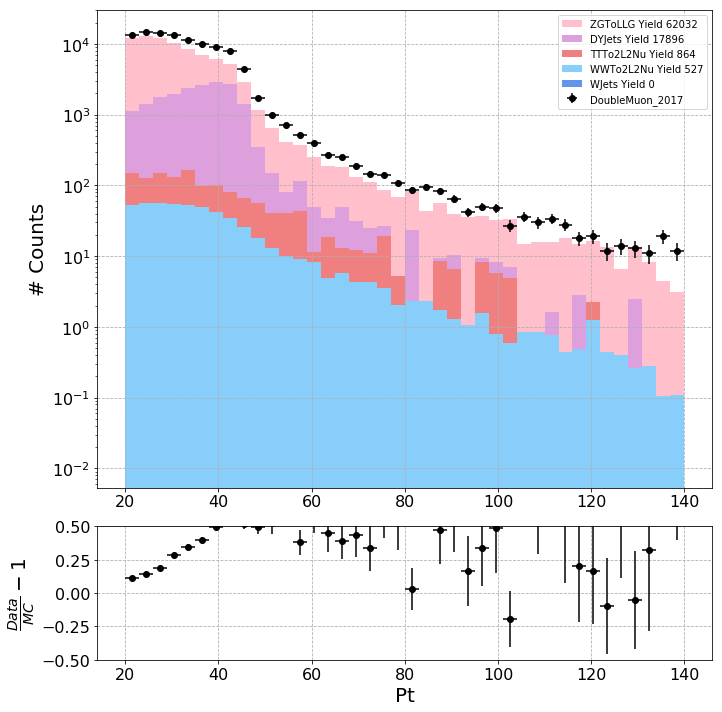

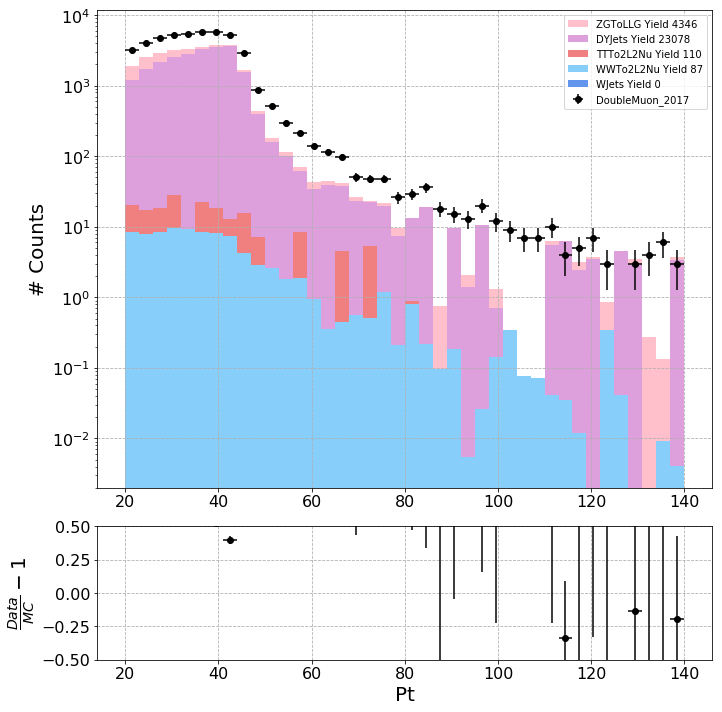

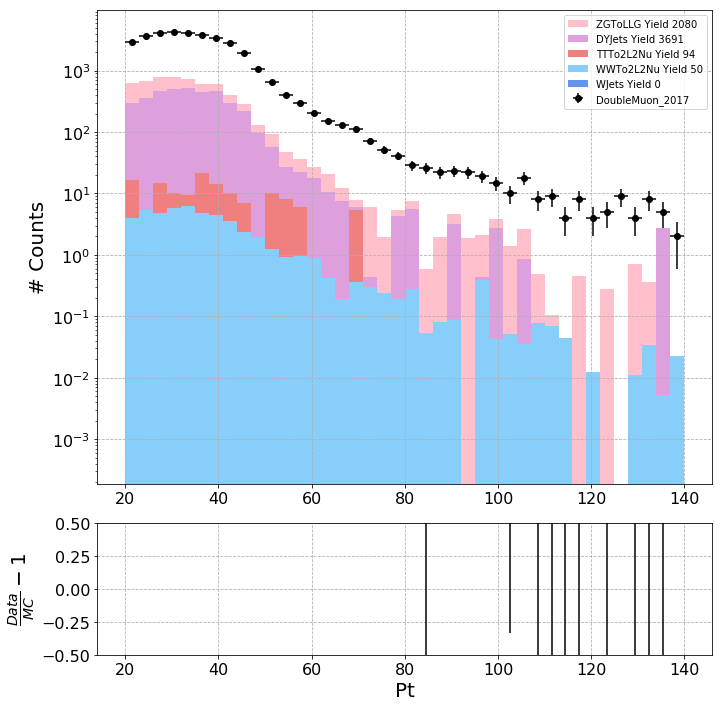

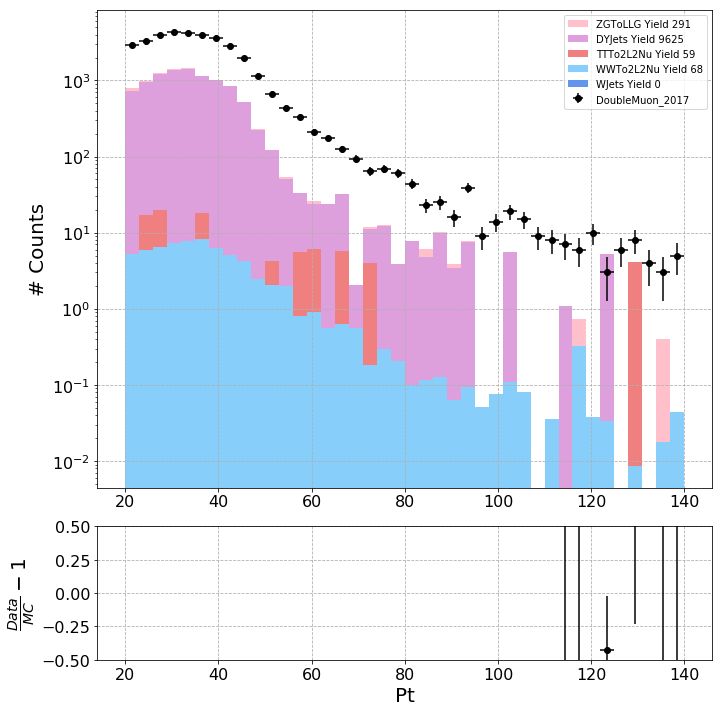

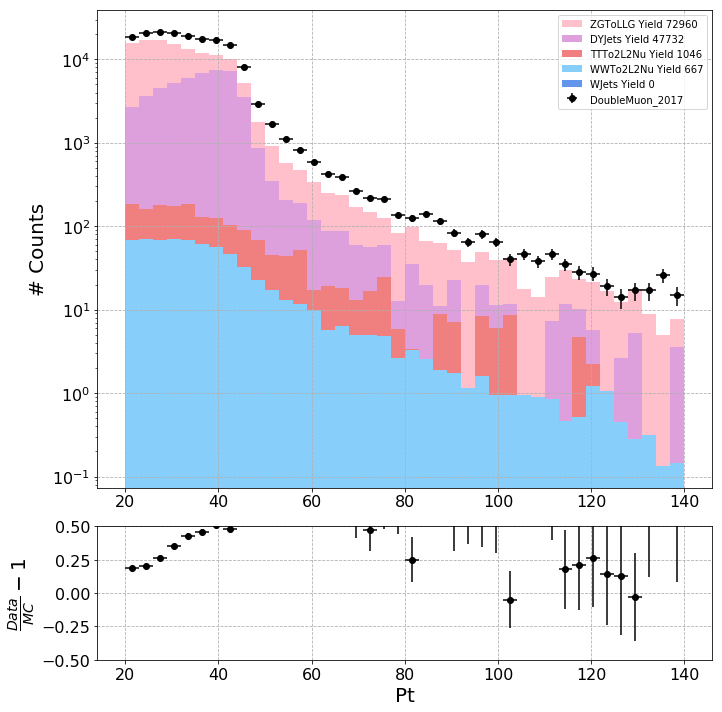

In [84]:
#part = 'photonOne'
#part = 'leptonOne'
part = 'leptonTwo'
var = 'Pt'
ph = ''

#part = 'dilepton'
#part = 'llg'
#var = 'M'
#var = 'Pt'
#ph = ''

#phRange = ['EB','EE']
#phRange = ['EB']
phRange = ['']

#part = 'photonOne'
#var = 'Ich'
#ph = ''


Plotting = True

#weightCorrection = True
weightCorrection = False

CustomeRangeBins = {}

h = {}


regionRangeABCD = ['A','B','C','D','AB']
regionRangeValidation = ['Ap','Bp','Cp','Dp']

if Validation:
    regionRange = regionRangeValidation
else:
    regionRange = regionRangeABCD
    
for phType in phRange:
    #Cutting = ['']
    #Cutting = [phType]
    Cutting = ['IPFS',phType]
    
    for region,k  in zip(regionRange,range(len(regionRangeABCD))):
        #h[regionRangeABCD[k]] = {}
        h[region] = {}
        names = [d.name for d in data[region]]

        Plotter.SetPlotOpt(colors = color,
                           legend = names,
                          )

        Cut.PhaseSpace(
                        data[region],
                        phType = phType,
                        Charge = Charge,
                        Region = Cutting,
                        Print  = False,
                        MVA    = MVA,
                        vetoDY = vetoDY,
                      )    
        if var == 'Ich':
            if region == 'A' or region == 'B':
                CustomeRangeBins = {}
            else:
                CustomeRangeBins = {'ranges':[2,15],
                                    'bins':30,
                                   }

        PlotVars = Plotter.Plot(data[region],
                                 part             = part,
                                 var              = var,
                                 signalInclude    = True,
                                 log              = log,
                                 Blind            = Blind,
                                 weightCorrection = weightCorrection,
                                 CustomeRangeBins = CustomeRangeBins,
                                 index            = phType+'_'+region,
                                );

        ########################
        for nm,j in zip(names,range(len(names))):
            #h[regionRangeABCD[k]][nm],Bins = Help.FindRegionInSideband(data[region][j],part = part,var = var, ph = ph)   
            h[region][nm],Bins = Help.FindRegionInSideband(data[region][j],part = part,var = var, ph = ph)   


# Getting the non-prompt Bkg

In [85]:
def GetABDCParam(BkgYield, SignalYield, DataYield, ABCD_STD = True ,A='A',B='B',C='C',D='D'):
    
    if ABCD_STD:
        frac = BkgYield[C]/BkgYield[D]
        fracErr = frac*np.sqrt(1/BkgYield[C]+1/BkgYield[D])

        Bkg = frac*BkgYield[B]
    else:
        eph = SignalYield[A]/(SignalYield[A] + SignalYield[B])
        ej  = BkgYield[C]/(BkgYield[C]+ BkgYield[D])
        
        frac,fracErr = 0,0
        
        Bkg = ((1-eph)*DataYield[A] - (1-ej)*DataYield[B])/((1-eph)-(1-ej)*(1-ej))
    
    Bkg = np.abs(Bkg)
        
    return frac,fracErr,Bkg

In [86]:
def GetBkgABCD(h,Names,ABCD_STD=True,A='A',B='B',C='C',D='D'):
    NonPrompt,Prompt = {},{}

    frac,fracErr = {},{}

    for etaS in h[A]['ZGToLLG'].keys():
        print(etaS)

        NonPrompt[etaS] = []
        Prompt[etaS]    = []
        frac[etaS]      = []
        fracErr[etaS]   = []
        
        for varS in h[A]['ZGToLLG'][etaS].keys():        
            BkgYield    = {}
            PromptYield = {}
            DataYield   = {}

            ####################################

            for region in [A,B,C,D]:
                DataYield[region]  = np.sum(h[region]['DoubleMuon_2017'][etaS][varS][0])
                NMC                 = round(np.sum(h[region]['DYJets'][etaS][varS][0]))
                PromptYield[region] = 0

                for name in Names:
                    PromptYield[region] += np.sum(h[region][name][etaS][varS][0])

                if region == 'A':
                    BkgYield[region] = np.sum(h[region]['DYJets'][etaS][varS][0])
                else:
                    BkgYield[region] = DataYield[region] - PromptYield[region]

            ####################################

            f,fe,nonPrompt = GetABDCParam(BkgYield    = BkgYield,
                                          SignalYield = PromptYield, 
                                          DataYield   = DataYield,
                                          ABCD_STD    = ABCD_STD,
                                          A=A,B=B,C=C,D=D,
                                          )
            
            frac[etaS]     .append(f)
            fracErr[etaS]  .append(fe)
            NonPrompt[etaS].append(nonPrompt)
            #Prompt[etaS]   .append(PromptYield)
            Prompt[etaS]   .append(BkgYield)

            ########
            
            #print('d',f,'C ',round(PromptYield['C'],2),' D ',round(PromptYield['D'],2))
            #print()

    return NonPrompt,Prompt, frac,fracErr    

# Plotting with Data Driven method

In [87]:
def GenerateBkg(part,var,ph,
                Bins,h):
    Signal, Background = {},{}
    SigmaS, SigmaB = {},{}

    for eta in Bins['photonOneEta']: 
        etaS = str(eta)

        Signal[etaS]     = []
        Background[etaS] = []
        SigmaS[etaS] = []
        SigmaB[etaS] = []
        for var1, j in zip(Bins[part+var+ph], range(len(Bins[part+var+ph]))):
            ############
            
            var1S = str(var1)

            region = 'B'
            NN = 0
            for name in PromptNames:
                NN += np.sum(h[region][name][etaS][varS][0])
            SUM[region] = np.sum(h[region]['DoubleMuon_2017'][etaS][varS][0]) - NN

            #NSig = FIT[etaS][var1S][0][0]
            #NBkg = FIT[etaS][var1S][0][1]
            NBkg = np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0])- NSig

            SigmaSig = FIT[etaS][var1S][1][0]
            SigmaBkg = 0#FIT[etaS][var1S][1][0]
            
            ############
            
            Signal[etaS]    .append(NSig)
            Background[etaS].append(NBkg)

            SigmaS[etaS].append(SigmaSig)
            SigmaB[etaS].append(SigmaBkg)


    return Signal, Background, SigmaS, SigmaB 

In [88]:
def HistogramingVariables(
                         data,
                         part,var,ph,
                         Bins, 
                         Signal, Background,
                         DataDriven       = False,
                         ZGDataDriven     = False,
                         weightCorrection = False,
                         ):    
    VAR,X = {},{}
    ranges,B = Help.GET_RangeBins(part,var,ph, Blind=False,Plotting=Plotting)

    ####################
    
    InitialCuts = {}
    for d in data:
        InitialCuts[d.name] = d.cuts
        
    ############################
    
    #for eta in Bins['photonOneEta'],:
    for eta,phType in zip(Bins['photonOneEta'],['EB','EE']):
        etaS = str(eta)
        
        VAR[etaS] = []
        X[etaS]   = []
        
        Cut.PhaseSpace( 
                        data,
                        phType   = '',
                        Charge   = 'oposite',
                        Region   = ['IPFS',phType],
                        MVA      = False,
                        vetoDY   = True,
                        ichRange = None,
                        Print    = False,
                      )
        for d in data:
            HH = Plotter.BinnedHist(data = d, 
                                    var = var, part = part,
                                    weightCorrection = weightCorrection,
                                   )
            VAR[etaS].append(HH[0])
            X[etaS].append(HH[1])
         
        xc = []
        for x in X[etaS]:
            xc.append((x[1:]+x[:-1])/2)

        X[etaS]   = np.array(X[etaS])
        VAR[etaS] = np.array(VAR[etaS])
        
        if DataDriven: 
            Names[-3] = 'non-prompt'
            VAR[etaS][-3] = np.array(Background[etaS])            
            if ZGDataDriven:
                VAR[etaS][Names=='ZGToLLG'] = np.array(Signal[etaS])
        else:
            Names[-3] = 'DYJets'


        ''' 
        if DataDriven:
            VAR[etaS][Names=='DYJets'] = np.array(Background[etaS])
            if ZGDataDriven:
                VAR[etaS][Names=='ZGToLLG'] = np.array(Signal[etaS])
        ''';
                   
    for d in data:
        d.ResetCuts(InitialCuts[d.name])
    
    return VAR,X,ranges,Names

In [89]:
def Plotting(data,ABCD,
             part,var,ph,
             Bins,
             Names,color,
             Bkg,Sig = None,
             DataDriven       = True,
             ZGDataDriven     = False,
             weightCorrection = False,
            ):

    VAR,X,ranges,Names = HistogramingVariables(data = data[ABCD],
                                              part = part,var = var,ph = ph,
                                              Bins = Bins, 
                                              Signal = Sig, Background = Bkg,
                                              DataDriven       = DataDriven,
                                              ZGDataDriven     = ZGDataDriven,
                                              weightCorrection = weightCorrection,
                                            ) 

    PlotVars[index] = {}
    for eta,phType in zip(Bins['photonOneEta'],['EB','EE']): 
        etaS = str(eta)

        PlotVars[index][etaS] = Plotter.Plot_Bin(
                                         VAR    = VAR[etaS], wei    =  VAR[etaS],
                                         label  =     Names, colors =      color,
                                         ranges =    ranges, bins   = X[etaS][0],
                                         var              = var,
                                         part             = part,
                                         signalInclude    = True,
                                         stacked          = True,
                                         density          = False,
                                         log              = log,
                                         Plotting         = True,
                                         Blind            = True,
                                         StatInclude      = False,
                                         index            = phType +'_'+ index,
                                        );
    
    return VAR, X, PlotVars

In [90]:
def SaveDataMC(part,var,ph,Bins,PlotVars,Plot = False):
    ranges = [-0.4,1]
    bins = np.arange(ranges[0],ranges[1],step=0.05)

    DataMC = {}
    DataMCerr = {}

    for eta in Bins['photonOneEta']:
        etaS = str(eta)
        if etaS == '[0, 1.4442]':
            phType = 'EB'
        else:
            phType = 'EE'

        DataMC[etaS]    = PlotVars[etaS][-2]
        DataMCerr[etaS] = PlotVars[etaS][-1]

    ############################################
    R = pd.DataFrame()
    R['var'] = Bins[part+var+ph]
    for k in DataMC.keys():
        print(len(R['var']),len(DataMC[k]))
        R[k] = DataMC[k]

    df = pd.DataFrame(R)

    df.to_csv(path+'DataMC/'+part+var+ph+'_ABCD.csv')
    ############################################
    R = pd.DataFrame()
    R['var'] = Bins[part+var+ph]
    for k in DataMCerr.keys():
        R[k] = DataMCerr[k]

    df = pd.DataFrame(R)

    df.to_csv(path+'DataMC/'+part+var+ph+'_ABCD_Err.csv')
    ############################################
    if Plot:
        plt.figure(figsize = (8,8))
        plt.hist(
                DataMC[etaS][:int(len(DataMC[etaS])/2)],
                bins      = bins,
                range     = ranges,
                linewidth = 1.7,
                histtype  = 'step',
                #label     = etaS,
                );
        plt.hist(
                DataMC[etaS][int(len(DataMC[etaS])/2):],
                bins      = bins,
                range     = ranges,
                linewidth = 1.7,
                histtype  = 'step',
                #label     = etaS,
                );
        plt.xlabel(r'$\frac{Data}{MC}$')
        plt.title(phType)
        plt.legend()
    return DataMC,DataMCerr

In [91]:
fracABCD = {}
fracABCDErr = {}
PlotVars = {}

[0, 1.4442]
[1.5666, 2.5]


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


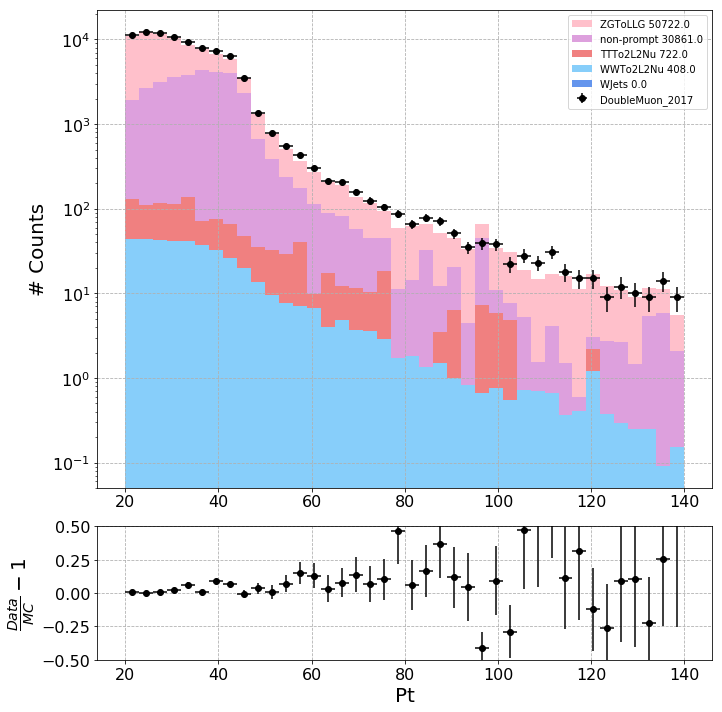

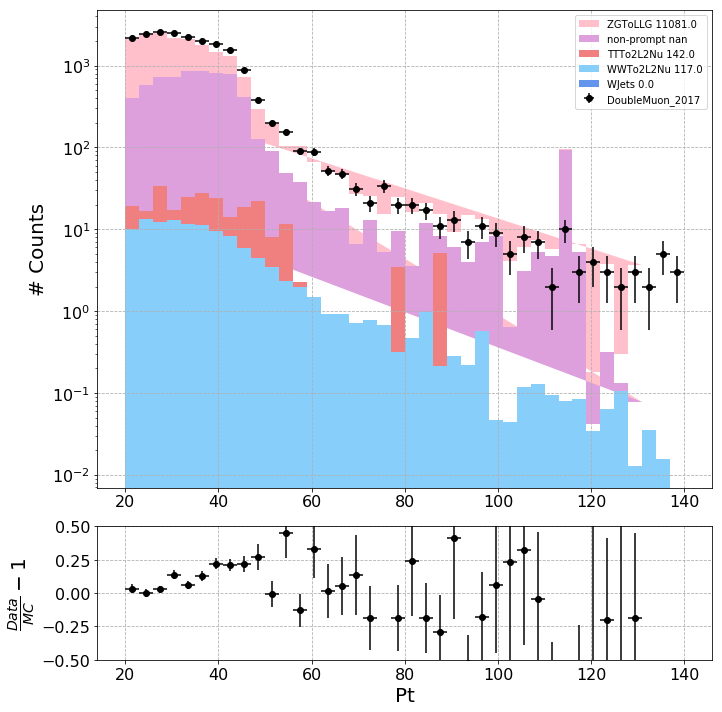

40 40
40 40


In [92]:
##################

Reset(data)

##########################
Sig = None

DataDriven = True
#DataDriven = False

ABCD_STD = True
#ABCD_STD = False

#ZGDataDriven = True
ZGDataDriven = False

#weightCorrection = True
weightCorrection = False

##########################
if ABCD_STD:
    if Validation:
        ABCD = 'Ap'
        A,B,C,D = 'Ap','Bp','Cp','Dp'
    else:
        ABCD = 'A'
        A,B,C,D = 'A','B','C','D'
else:
    ABCD = 'AB'
    A,B,C,D = 'A','B','C','D'

Cutting = 'IPFS'
###########################


Cut.PhaseSpace(
            data[ABCD],
            phType = phType,
            Charge = Charge,
            Region = Cutting,
            Print  = False,
            MVA    = MVA,
            vetoDY = vetoDY,
          )

#data[ABCD][-3].ResetCuts()
##########################


NonPrompt,Prompt, fracABCD[Validation],fracABCDErr[Validation] = GetBkgABCD(h,PromptNames,ABCD_STD=ABCD_STD,A=A,B=B,C=C,D=D)
#NonPrompt,Prompt, fracABCD,fracABCDErr = GetBkgABCD(h,PromptNames,ABCD_STD=ABCD_STD,A=A,B=B,C=C,D=D)
Background = {}

Background = NonPrompt

if DataDriven:
    if ABCD_STD:
        index = 'DD_ABCD'
    else:
        index = 'DD_ABCD_AB'
else:
    index = 'MC'
    
VAR, X, PlotVars = Plotting(data  = data,ABCD = ABCD,
                             part  = part,var = var, ph = ph,
                             Bins  = Bins,
                             Names = Names,color = color,
                             Bkg = Background,Sig = None,
                             DataDriven       = True,
                             ZGDataDriven     = False,
                             weightCorrection = False,
                            )

#SaveDataMC(part=p,var=v,ph=ph,Bins=Bins,PlotVars=PlotVars,Plot = False)
SaveDataMC(part=part,var=var,ph=ph,Bins=Bins,PlotVars=PlotVars[index],Plot = False)


# Ratio validation in Primened region

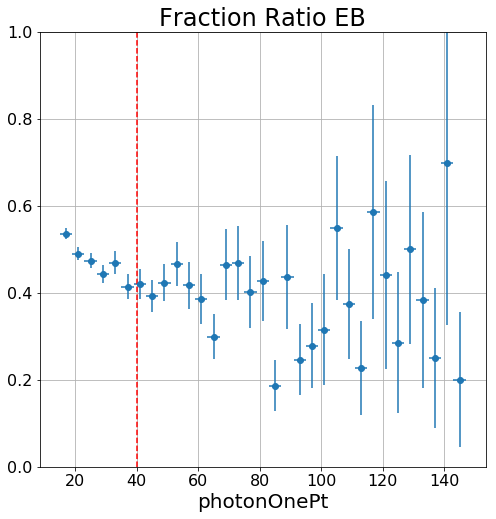

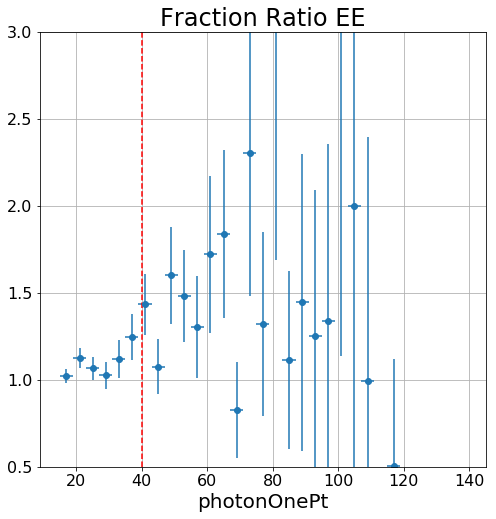

In [143]:
frac    = fracABCD
fracErr = fracABCDErr

for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4442]':
        phType = 'EB'
    else:
        phType = 'EE'
    
    FRAC = []
    FRACErr = []

    fig = plt.figure(figsize=(8,8))
    for varS,i in zip(Bins[part+var+ph],range(len(Bins[part+var+ph]))):
        F = fracABCD[True][etaS][i]
        FRAC.append(F)
        FRACErr.append(fracErr[True][etaS][i])
        
    plt.errorbar(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
                 FRAC,
                 xerr      = np.diff(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))/2,
                 yerr      = FRACErr,
                 marker    = 'o',
                 linestyle = '',
                )
    ax = plt.gca()
    if part == 'dilepton' and var == 'M':
        if phType == 'EB':
            ax.set_ylim([0,9])
        else:
            ax.set_ylim([0,9])
        
        plt.axvline(x=80,color = 'r',linestyle='--')
    elif part == 'photonOne' and var == 'Pt':
        if phType == 'EB':
            ax.set_ylim([0,1])
        else:
            ax.set_ylim([0.5,3])
        plt.axvline(x=40,color = 'r',linestyle='--')
        
    plt.title('Fraction Ratio '+phType)
    plt.xlabel(part+var+ph)
    plt.show()
    
    
    fig.savefig(figpath+part+var+ph+'_FractionValidation_'+phType+'.png')

In [144]:
PromptNames

['WJets', 'WWTo2L2Nu', 'TTTo2L2Nu', 'ZGToLLG']

In [145]:
#Background
Ap = {}
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    
    print('------------',etaS)
    Ap[etaS] = []
    for var1,i in zip(Bins[part+var+ph],range(len(Bins[part+var+ph]))):
        varS = str(var1)
        
        NData = np.sum(h['Ap']['DoubleMuon_2017'][etaS][varS][0])
        NP = 0
        for name in PromptNames:
            NP += np.sum(h['Ap'][name][etaS][varS][0])
        NNP = NData - NP
        
        Ap[etaS].append(NNP)
        
        print(var1,' | ',round(Background[etaS][i],2),' | ',round(Ap[etaS][i],2))
        

------------ [0, 1.4442]
[15.0, 19.0]  |  5063.87  |  4616.11
[19.0, 23.0]  |  2372.35  |  2024.49
[23.0, 27.0]  |  1161.24  |  904.6
[27.0, 31.0]  |  553.32  |  511.09
[31.0, 35.0]  |  356.07  |  325.91
[35.0, 39.0]  |  201.3  |  191.69
[39.0, 43.0]  |  127.92  |  131.99
[43.0, 47.0]  |  97.93  |  103.06
[47.0, 51.0]  |  70.92  |  61.96
[51.0, 55.0]  |  56.59  |  64.42
[55.0, 59.0]  |  49.99  |  39.32
[59.0, 63.0]  |  34.3  |  31.73
[63.0, 67.0]  |  19.89  |  18.45
[67.0, 71.0]  |  26.36  |  23.04
[71.0, 75.0]  |  18.12  |  19.55
[75.0, 79.0]  |  16.64  |  17.65
[79.0, 83.0]  |  14.34  |  6.69
[83.0, 87.0]  |  6.09  |  6.0
[87.0, 91.0]  |  13.1  |  7.64
[91.0, 95.0]  |  3.19  |  2.59
[95.0, 99.0]  |  6.4  |  6.6
[99.0, 103.0]  |  3.63  |  5.0
[103.0, 107.0]  |  7.13  |  8.0
[107.0, 111.0]  |  2.61  |  1.99
[111.0, 115.0]  |  0.68  |  7.0
[115.0, 119.0]  |  4.51  |  4.0
[119.0, 123.0]  |  1.33  |  3.0
[123.0, 127.0]  |  3.14  |  0.0
[127.0, 131.0]  |  2.5  |  1.99
[131.0, 135.0]  |  1.

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


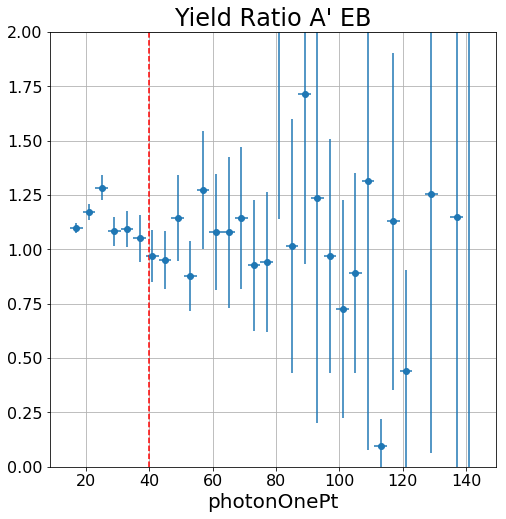

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


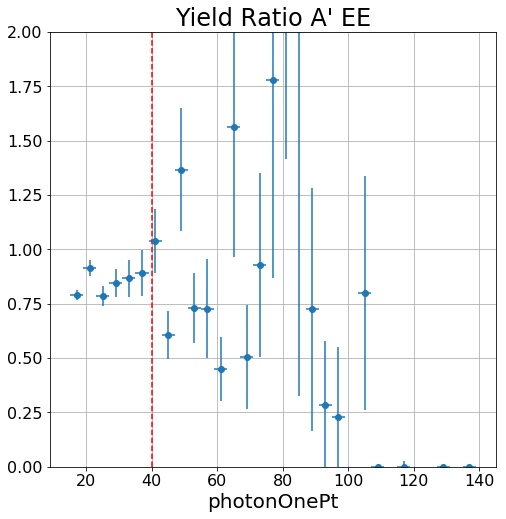

In [146]:
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4442]':
        phType = 'EB'
    else:
        phType = 'EE'
    
    fig = plt.figure(figsize=(8,8))
    uncAp = np.array(Background[etaS])/np.array(Ap[etaS])
    yerr = uncAp*np.sqrt((1/np.array(Background[etaS])) + (1/np.array(Ap[etaS])))

    plt.errorbar(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
             uncAp,
             xerr      = np.diff(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))/2,
             yerr      = yerr,
             marker    = 'o',
             linestyle = '',
            )
    
    ax = plt.gca()
    if part == 'dilepton' and var == 'M':
        if phType == 'EB':
            ax.set_ylim([0,9])
        else:
            ax.set_ylim([0,9])
        
        plt.axvline(x=80,color = 'r',linestyle='--')
    elif part == 'photonOne' and var == 'Pt':
        if phType == 'EB':
            ax.set_ylim([0,2])
        else:
            ax.set_ylim([0,2])
        plt.axvline(x=40,color = 'r',linestyle='--')
        
    plt.title('Yield Ratio A\' '+phType)
    plt.xlabel(part+var+ph)
    plt.show()
    fig.savefig(figpath+part+var+ph+'_YieldFractionValidation_'+phType+'.png')

# Ratio of fractions for validation

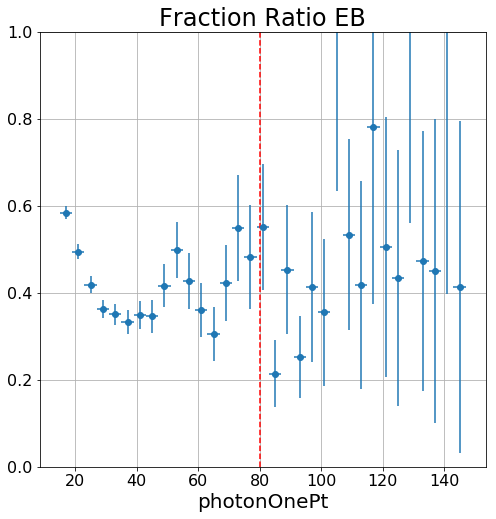

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


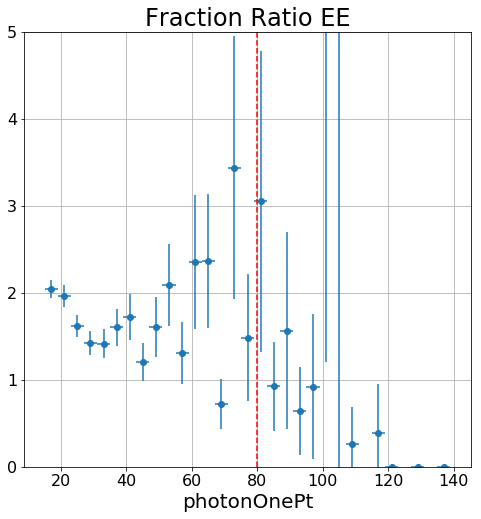

In [147]:

frac    = fracABCD
fracErr = fracABCDErr

for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4442]':
        phType = 'EB'
    else:
        phType = 'EE'
    
    FRAC = []
    FRACErr = []

    fig = plt.figure(figsize=(8,8))
    for varS,i in zip(Bins[part+var+ph],range(len(Bins[part+var+ph]))):
        F = fracABCD[True][etaS][i]/fracABCD[False][etaS][i]
        FRAC.append(F)
        FRACErr.append(F*np.sqrt((fracErr[True][etaS][i]/fracABCD[True][etaS][i])**2 + (fracErr[False][etaS][i]/fracABCD[False][etaS][i])**2))
        
    plt.errorbar(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
                 FRAC,
                 xerr      = np.diff(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))/2,
                 yerr      = FRACErr,
                 marker    = 'o',
                 linestyle = '',
                )
    ax = plt.gca()
    if phType == 'EB':
        ax.set_ylim([0,1])
    else:
        ax.set_ylim([0,5])
    plt.axvline(x=80,color = 'r',linestyle='--')
    plt.title('Fraction Ratio '+phType)
    plt.xlabel(part+var+ph)
    plt.show()
    
    
    fig.savefig(figpath+part+var+ph+'_Fraction_'+phType+'.png')

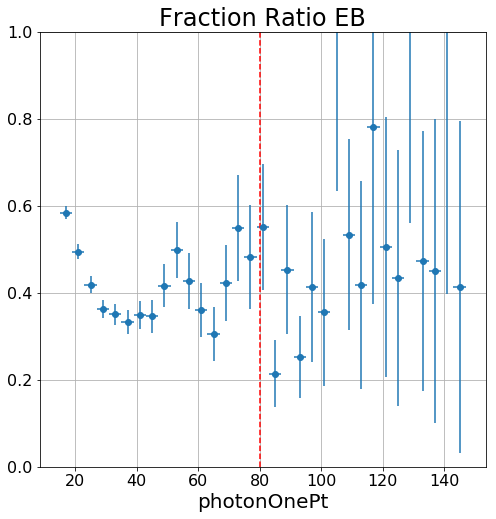

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


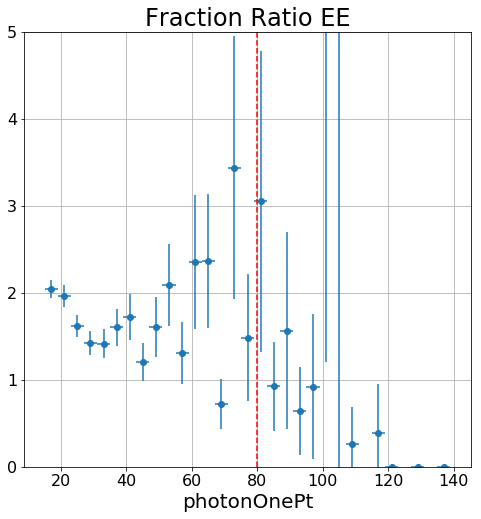

In [148]:

frac    = fracABCD
fracErr = fracABCDErr

for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4442]':
        phType = 'EB'
    else:
        phType = 'EE'
    
    FRAC = []
    FRACErr = []

    fig = plt.figure(figsize=(8,8))
    for varS,i in zip(Bins[part+var+ph],range(len(Bins[part+var+ph]))):
        F = fracABCD[True][etaS][i]/fracABCD[False][etaS][i]
        FRAC.append(F)
        FRACErr.append(F*np.sqrt((fracErr[True][etaS][i]/fracABCD[True][etaS][i])**2 + (fracErr[False][etaS][i]/fracABCD[False][etaS][i])**2))
        
    plt.errorbar(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
                 FRAC,
                 xerr      = np.diff(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))/2,
                 yerr      = FRACErr,
                 marker    = 'o',
                 linestyle = '',
                )
    ax = plt.gca()
    if phType == 'EB':
        ax.set_ylim([0,1])
    else:
        ax.set_ylim([0,5])
    plt.axvline(x=80,color = 'r',linestyle='--')
    plt.title('Fraction Ratio '+phType)
    plt.xlabel(part+var+ph)
    plt.show()
    
    
    fig.savefig(figpath+part+var+ph+'_Fraction_'+phType+'.png')

In [58]:

frac    = fracABCD
fracErr = fracABCDErr

for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4666]':
        phType = 'EB'
    else:
        phType = 'EE'
    
    FRAC = []
    FRACErr = []

    fig = plt.figure(figsize=(8,8))
    for varS,i in zip(Bins[part+var+ph],range(len(Bins[part+var+ph]))):
        FRAC.append(frac[etaS][i])
        FRACErr.append(fracErr[etaS][i])
        
    plt.errorbar(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
                 FRAC,
                 xerr      = np.diff(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))/2,
                 yerr      = FRACErr,
                 marker    = 'o',
                 linestyle = '',
                )
    ax = plt.gca()
    ax.set_ylim([0,2])
    plt.axvline(x=80,color = 'r',linestyle='--')
    plt.title('Fraction '+phType)
    plt.xlabel(part+var+ph)
    plt.show()
    
    
    fig.savefig(figpath+part+var+ph+'_Fraction_'+phType+'.png')

KeyError: True

<Figure size 576x576 with 0 Axes>

In [108]:
Count = {}
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    
    Count[etaS] = {}
    for region in ['A','B','C','D']:
        Count[etaS][region] = []
    for prompt in Prompt[etaS]:
        for region in ['A','B','C','D']:
            Count[etaS][region].append(prompt[region])

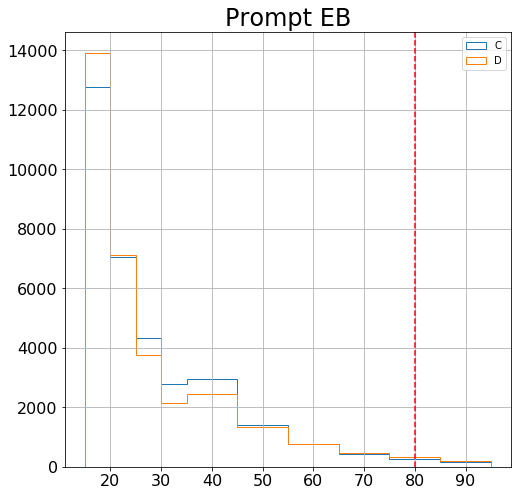

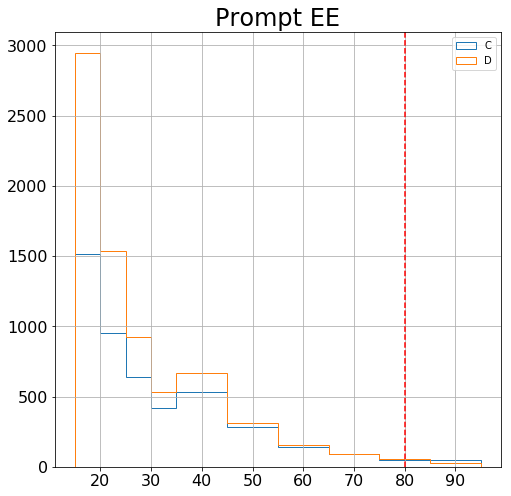

In [109]:
#RList = ['A','B','C','D']
#RList = ['B','C','D']
RList = ['C','D']
for eta in Bins['photonOneEta']:
    etaS = str(eta)
    if etaS == '[0, 1.4666]':
        phType = 'EB'
    else:
        phType = 'EE'
    plt.figure(figsize=(8,8))
    bins = np.array(Help.BinFormat(Bins=Bins[part+var+ph],Type='edges'))
    for region in RList:
        plt.hist(Help.BinFormat(Bins=Bins[part+var+ph],Type='center'),
                 bins     = bins[bins<120],
                 weights  = Count[etaS][region],
                 histtype = 'step',
                 label    = region,
                )
    ax = plt.gca()
    #ax.set_yscale('log')
    plt.axvline(x=80,color = 'r',linestyle='--')
    plt.title('Prompt '+phType)
    plt.legend()

# Determine Ich frac extrapolation 

# Test cuts

In [110]:
ichLow,ichHigh = 3,11.5
step = 0.5

In [111]:
Bins = {}

#######################################################
#part = 'dilepton'
#var = 'M'
#ph = ''

part = 'photonOne'
var = 'Pt'
ph = ''

ranges ,bins = Help.GET_RangeBins( part,var,ph,
                                    Blind    = True,
                                    Plotting = True, 
                                    File     = True,
                                    )
bins = Help.BinFormat(Bins=bins,Type='ranges')

Bins[part+var+ph]= bins
########################################################

Bins['photonOneEta']= [[0, 1.4666],[1.4666, 2.5]]

########################################################

Bins['']= ['']

In [112]:
'''
pathFrac = '/home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V4_phID_isConv_MINUIT/'
df = pd.DataFrame(frac)
df.to_json(pathFrac+'frac.json')
''';

In [113]:
def GetABCDBkg_Extrapol(part,var,ph,
                        Bins,Names,
                        ichRange=[3,11.5],step=0.5,
                        SingleVar = False, varTarget = '[68.0, 70.0]',
                        Print = False,
                       ):
    Reset(data)

    #############################

    frac,fracErr = {},{}
    NonPromptYield  = {}
    PromptYield   = {}

    print('----',part+var+ph,'-----')
    for eta in Bins['photonOneEta']:
        etaS = str(eta)
        if Print:
            print(etaS)

        frac[etaS]           = {}
        fracErr[etaS]        = {}
        NonPromptYield[etaS] = {}
        PromptYield[etaS]    = {}
        for var1 in Bins[part+var+ph]:     
            varS = str(var1)
            
            if SingleVar:
                if varS != varTarget: continue
            if Print:
                print('----'+varS)

            NonPromptYield[etaS][varS] = {}
            PromptYield[etaS][varS]    = {}
            
            frac[etaS][varS]    = {}
            fracErr[etaS][varS] = {}

            ####################################        

            for ich in np.arange(ichLow,ichHigh,step=step):
                frac[etaS][varS][ich]           = 0
                fracErr[etaS][varS][ich]        = 0
                NonPromptYield[etaS][varS][ich] = {}
                PromptYield[etaS][varS][ich]    = {}

                ####################################

                for region in ['A','B','C','D']:

                    Cutting = ['IPFS','Ich']
                    if region != 'A':
                        Cut.PhaseSpace(
                                    data[region],
                                    phType   = '',
                                    Charge   = True,
                                    Region   = Cutting,
                                    Print    = False,
                                    MVA      = MVA,
                                    vetoDY   = True,
                                    ichRange = [[ich,ich],[ich+1,ich+1]]
                                  )  
                    for nm,j in zip(names,range(len(names))):
                        h[region][nm],Bins = Help.FindRegionInSideband(data[region][j],part = part,var = var, ph = ph)   

                    NData = np.sum(h[region]['DoubleMuon_2017'][etaS][varS][0])
                    NMC   = round(np.sum(h[region]['DYJets'][etaS][varS][0]))

                    ####################################

                    NonPromptYield[etaS][varS][ich][region] = 0
                    PromptYield [etaS][varS][ich][region]   = 0

                    for name in Names:
                        PromptYield[etaS][varS][ich][region] += np.sum(h[region][name][etaS][varS][0])

                    if region == 'A':
                        NonPromptYield[etaS][varS][ich][region] = np.sum(h[region]['DYJets'][etaS][varS][0])
                    else:
                        NonPromptYield[etaS][varS][ich][region] = NData - PromptYield[etaS][varS][ich][region]

                ####################################
                C = NonPromptYield[etaS][varS][ich]['C']
                D = NonPromptYield[etaS][varS][ich]['D']

                if D == 0:
                    frac[etaS][varS][ich]    = 1
                    fracErr[etaS][varS][ich] = 1
                else:
                    frac[etaS][varS][ich]    = C/D
                    fracErr[etaS][varS][ich] = C/D*np.sqrt(1/C+1/D)

    return frac,fracErr,PromptYield,NonPromptYield

In [114]:
def PlotIch(part,var,ph,Bins,
            frac, fracErr,
            ichRange=[3,11.5],step=0.5,
            SingleVar = False, varTarget = '[68.0, 70.0]',
           ):
    for eta in Bins['photonOneEta']:
        etaS = str(eta)
        if etaS == '[0, 1.4666]':
            phType = 'EB'
        else:
            phType = 'EE'


        for var1 in Bins[part+var+ph]:
            varS = str(var1)
            if SingleVar:
                if varS != varTarget: continue
            
            fig = plt.figure(figsize=(8,8))

            FRAC,FRACErr = [],[]
            ICH = []

            for ich in np.arange(ichLow,ichHigh,step=step):
                ICH.append(ich)
                FRAC.append(frac[etaS][varS][ich])
                FRACErr.append(fracErr[etaS][varS][ich])

            plt.errorbar(ICH,FRAC,
                         xerr     = step/2,
                         yerr     = FRACErr,
                         marker   = 'o',
                        linestyle = '',
                        )

            plt.title('Fraction '+phType)
            ax = plt.gca()
            ax.set_xlim([0,ichHigh])
            plt.show()

            fig.savefig(figpath+part+var+ph+'_Fraction'+phType+'_'+varS+'.png')    

In [115]:
def PlotIch_Prompt(part,var,ph,Bins,
                    Yield,
                    ichRange=[3,11.5],step=0.5,
                    SingleVar = False, varTarget = '[68.0, 70.0]',
                   ):
    for eta in Bins['photonOneEta']:
        etaS = str(eta)
        if etaS == '[0, 1.4666]':
            phType = 'EB'
        else:
            phType = 'EE'

        for region in  ['C','D']:
            for var1 in Bins[part+var+ph]:
                varS = str(var1)
                if SingleVar:
                    if varS != varTarget: continue

                

                VAR,VARErr = [],[]
                ICH = []

                for ich in np.arange(ichLow,ichHigh,step=step):
                    ICH.append(ich)
                    VAR.append(Yield[etaS][varS][ich][region])
                    VARErr.append(np.sqrt(Yield[etaS][varS][ich][region]))

                    
                fig = plt.figure(figsize=(8,8))
                plt.errorbar(ICH,VAR,
                             xerr     = step/2,
                             yerr     = VARErr,
                             marker   = 'o',
                            linestyle = '',
                            )
                ax = plt.gca()
                plt.title(region+' Prompt '+phType)

                plt.show()
                fig.savefig(figpath+part+var+ph+'_Prompt'+phType+'_'+varS+'.png')

In [120]:
#SingleVar = True
SingleVar = False

Print     = True
#Print     = False

part = 'photonOne'
var = 'Pt'
ph = ''

ichLow = 3
ichHigh = 11.5
step = 0.5

if part == 'dilepton' and var == 'M':
    varTarget = '[68.0, 70.0]'
elif part == 'photonOne' and var == 'Pt':
    varTarget = '[35.0, 45.0]'
    

In [121]:
fracExtrapol,fracExtrapolErr,PromptYield,NonPromptYield = GetABCDBkg_Extrapol(part,var,ph,
                                                                            Bins = Bins,Names = PromptNames,
                                                                            ichRange=[ichLow,ichHigh],step=step,
                                                                            SingleVar = SingleVar, varTarget = varTarget,
                                                                            Print = Print,
                                                                           )

---- photonOnePt -----
[0, 1.4666]
----[15.0, 20.0]
----[20.0, 25.0]
----[25.0, 30.0]
----[30.0, 35.0]
----[35.0, 45.0]
----[45.0, 55.0]
----[55.0, 65.0]
----[65.0, 75.0]
----[75.0, 85.0]
----[85.0, 95.0]
----[95.0, 120.0]
[1.4666, 2.5]
----[15.0, 20.0]
----[20.0, 25.0]
----[25.0, 30.0]
----[30.0, 35.0]
----[35.0, 45.0]
----[45.0, 55.0]
----[55.0, 65.0]
----[65.0, 75.0]
----[75.0, 85.0]
----[85.0, 95.0]
----[95.0, 120.0]


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in sqrt


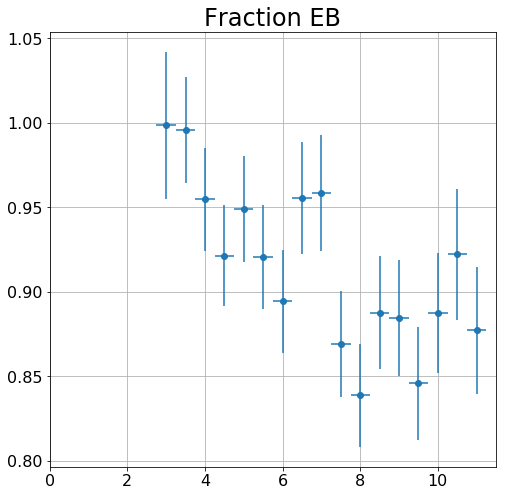

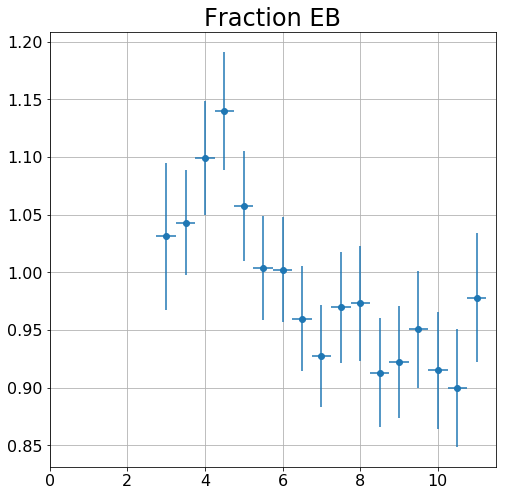

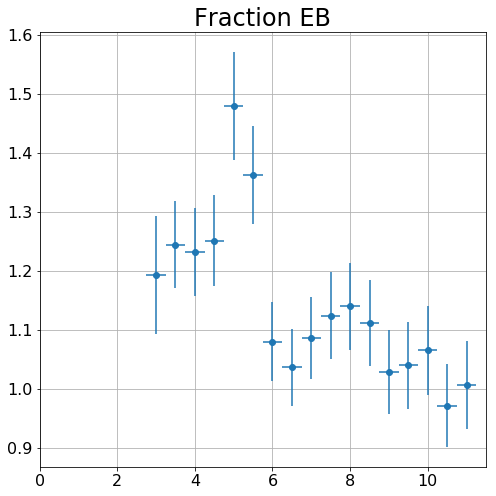

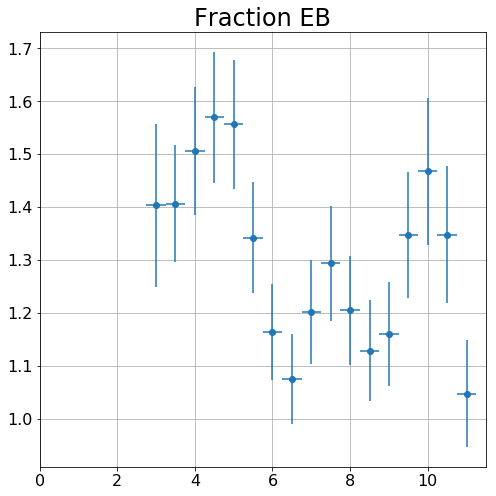

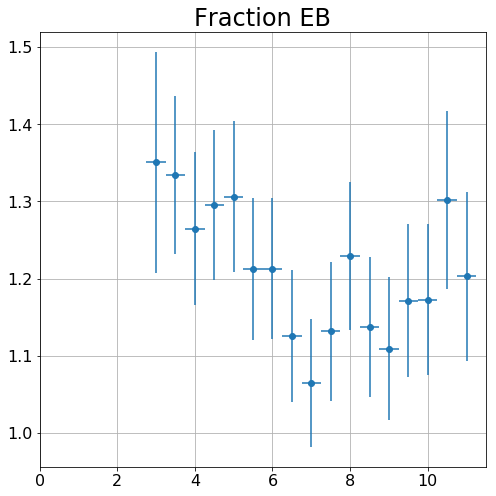

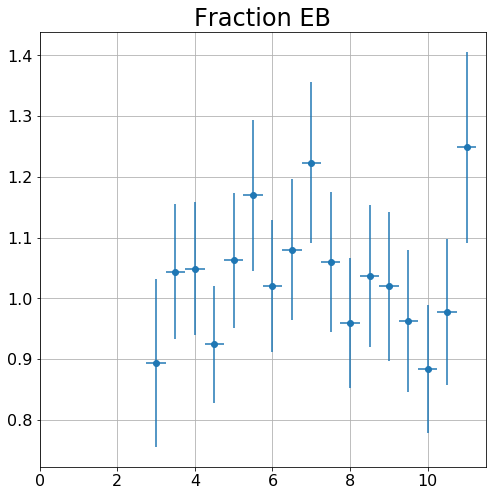

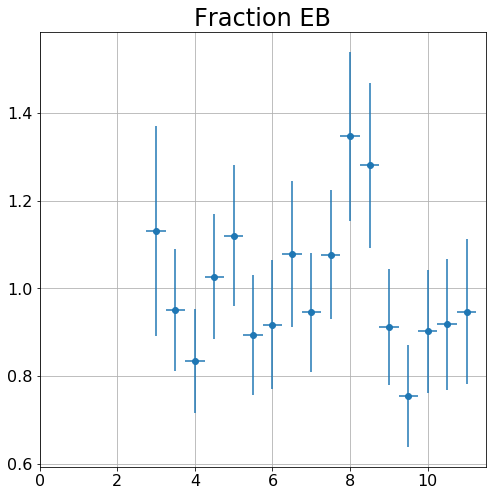

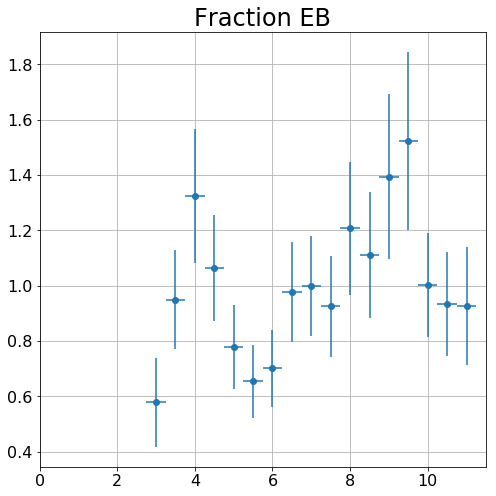

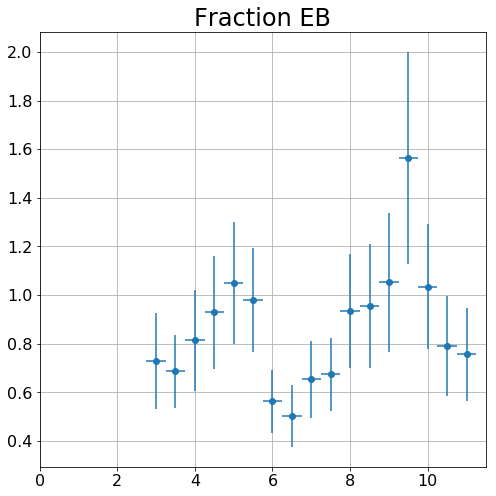

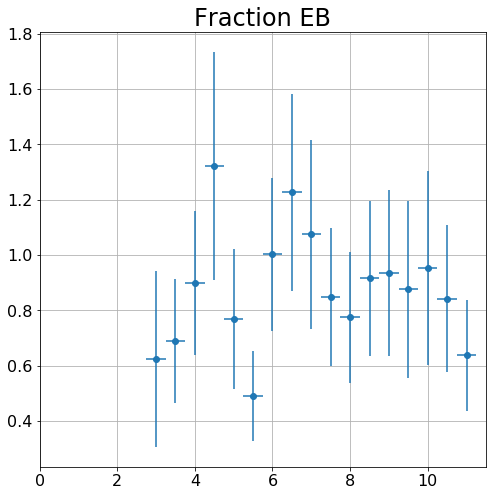

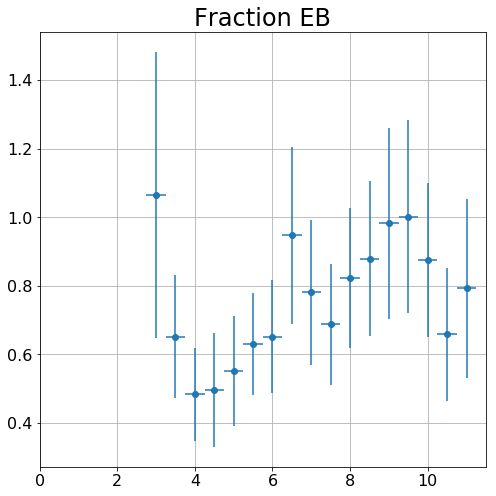

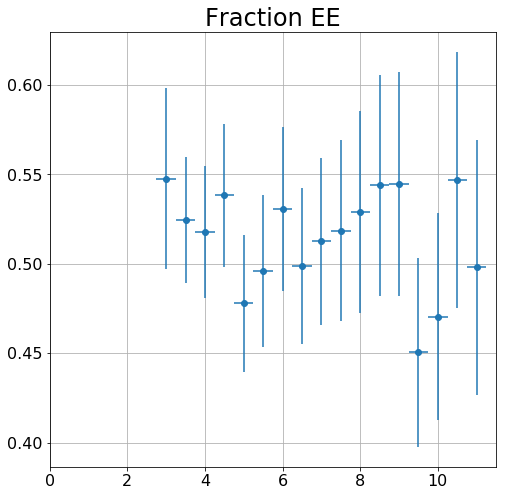

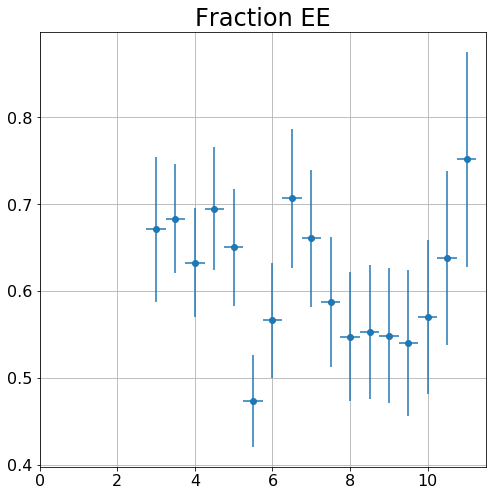

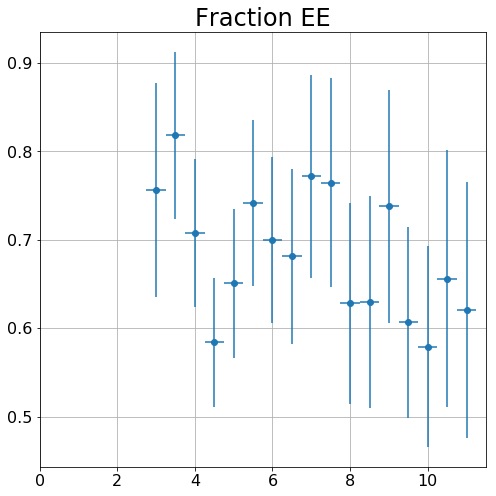

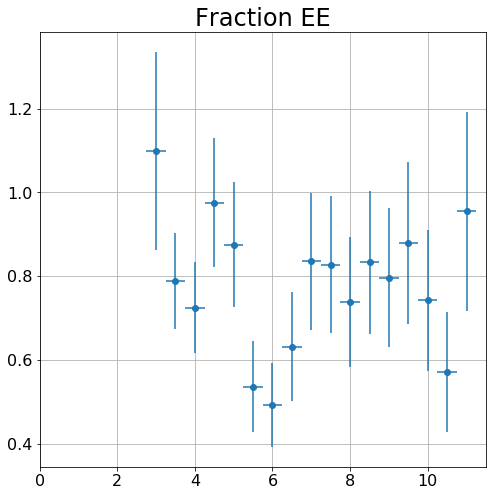

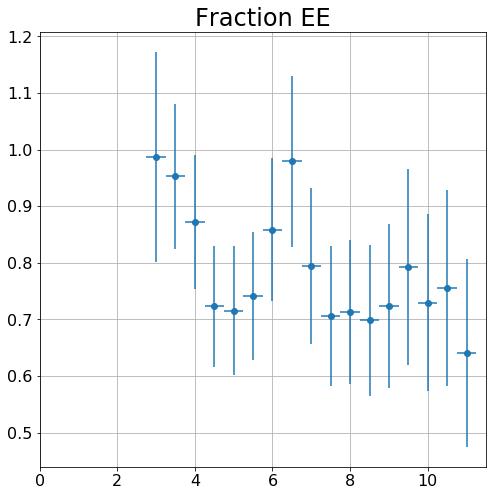

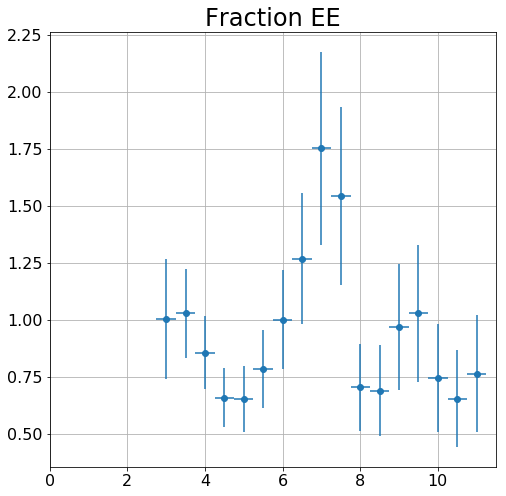

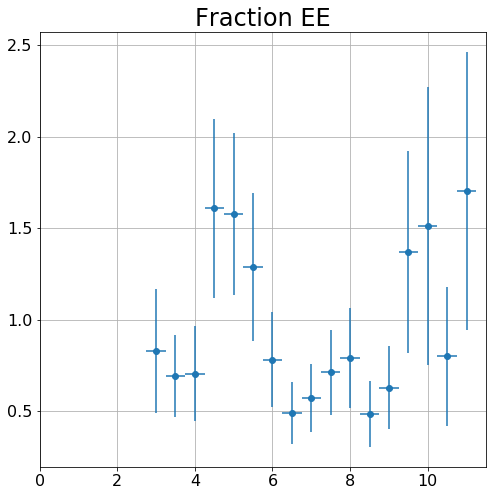

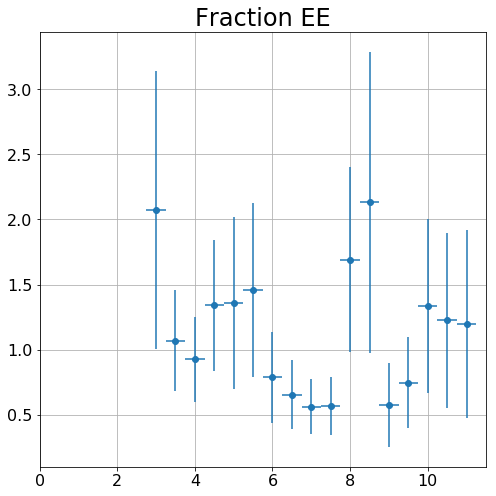

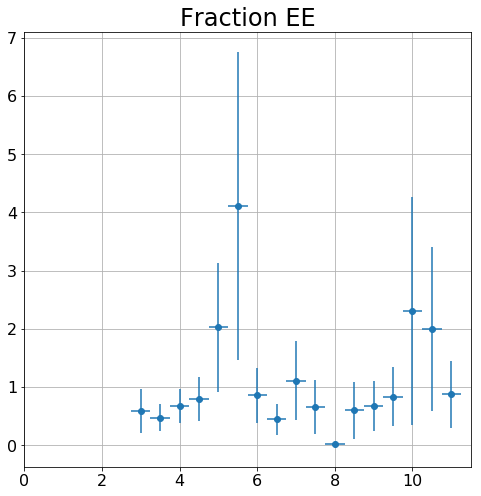

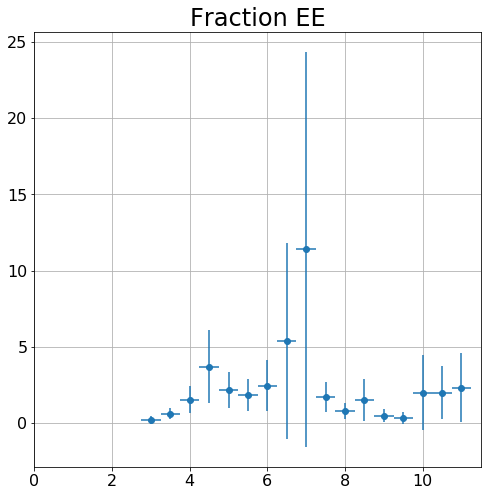

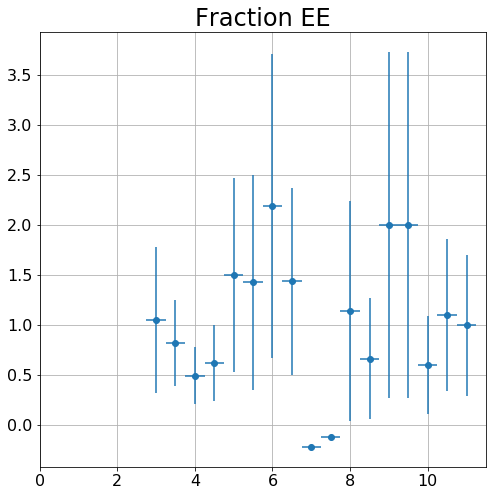

In [122]:
PlotIch(part,var,ph,
        Bins,
        frac=fracExtrapol, fracErr=fracExtrapolErr,
        ichRange=[ichLow,ichHigh],step=step,
        SingleVar = SingleVar, varTarget = varTarget,
       )

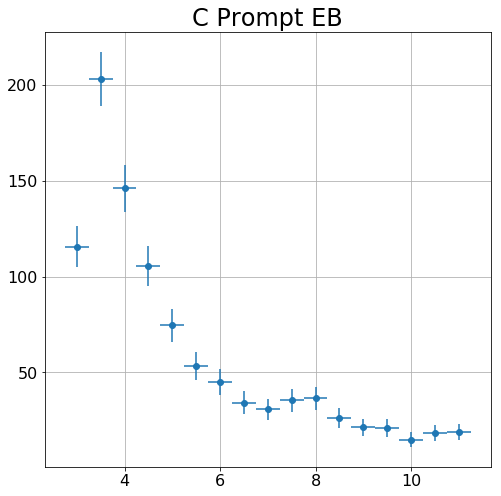

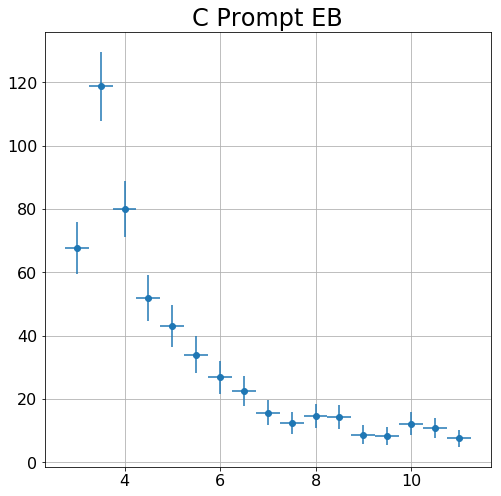

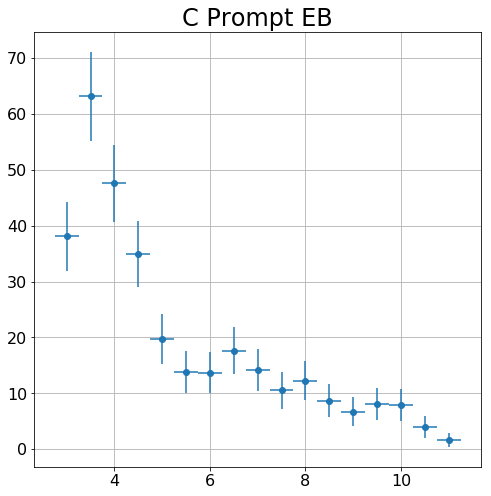

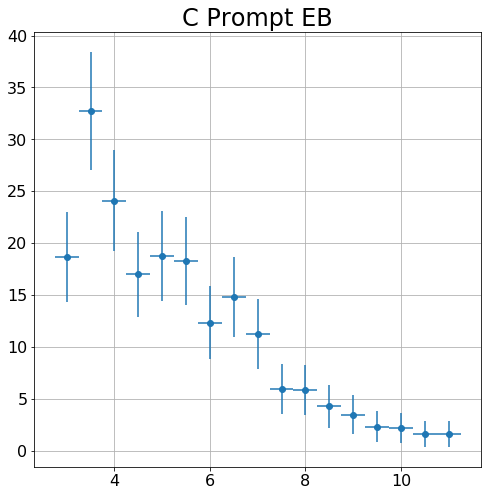

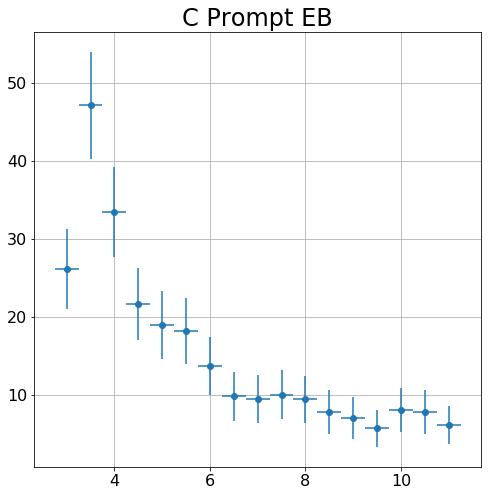

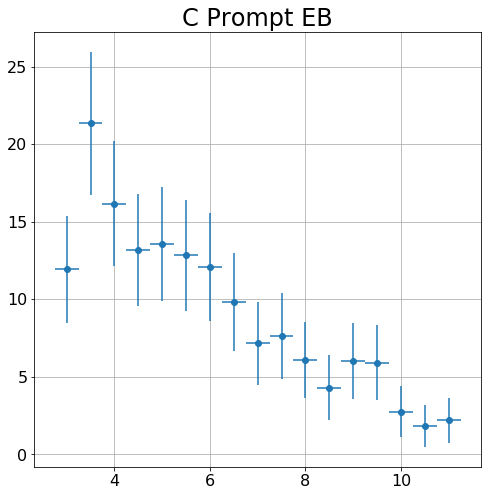

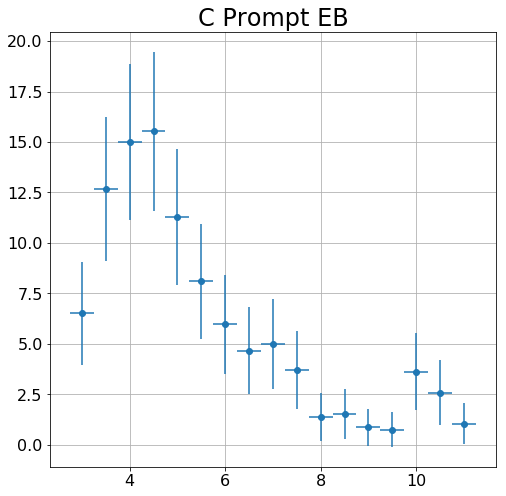

/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt


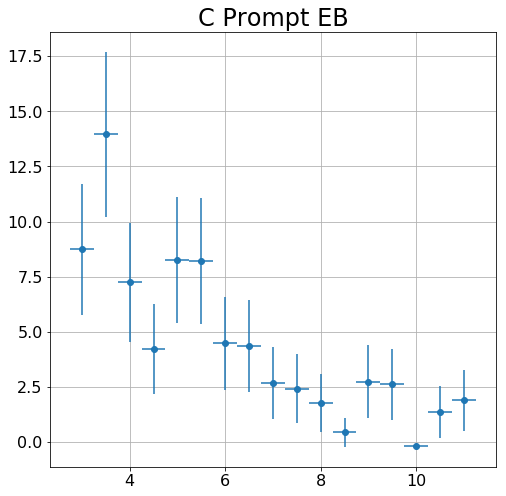

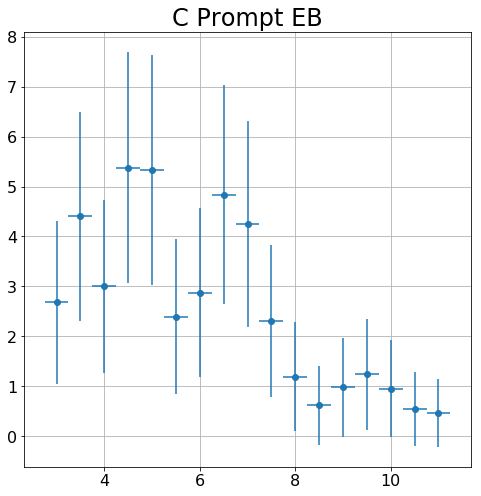

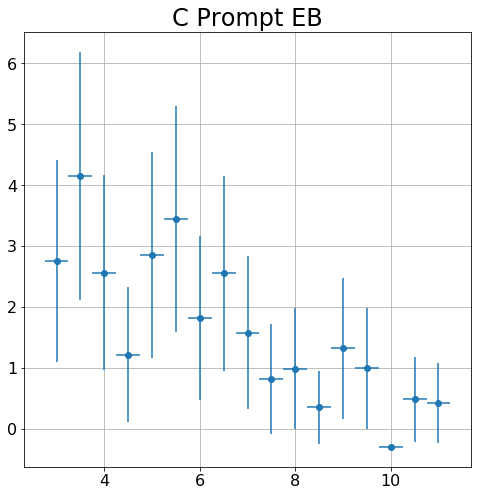

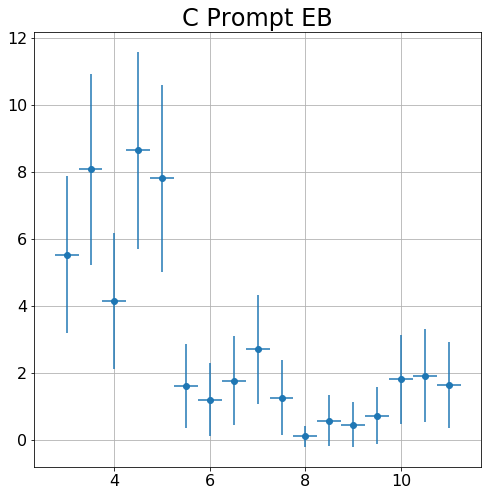

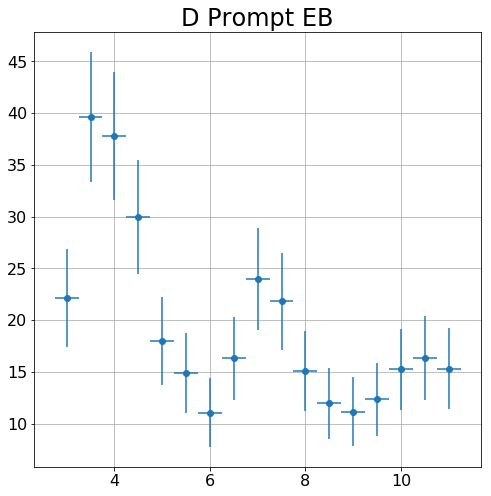

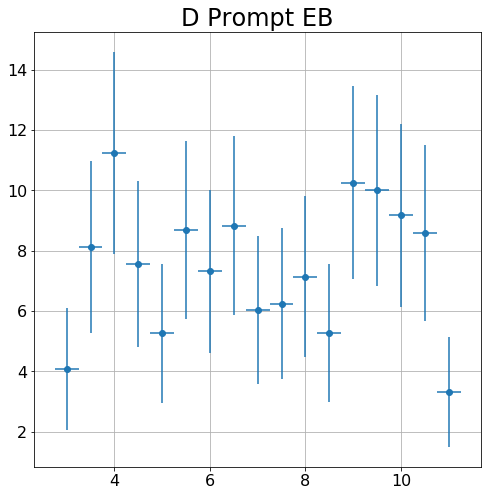

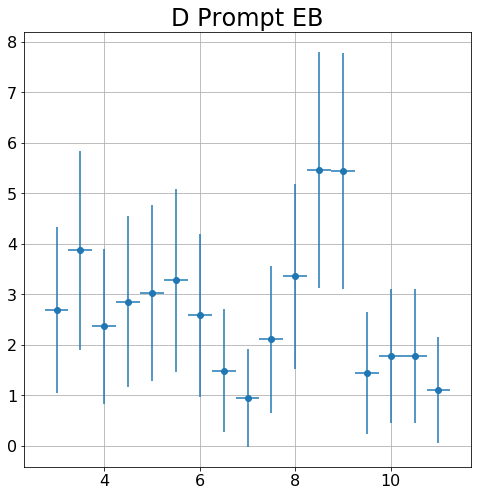

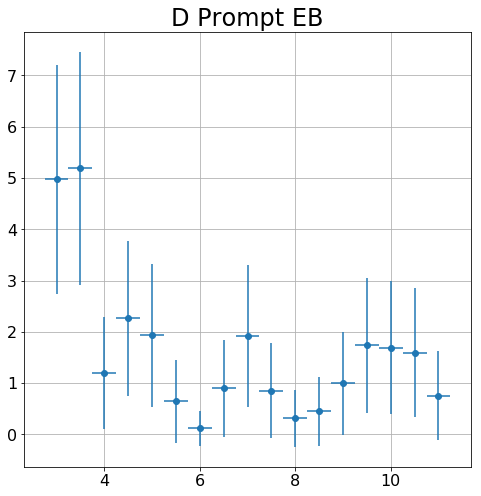

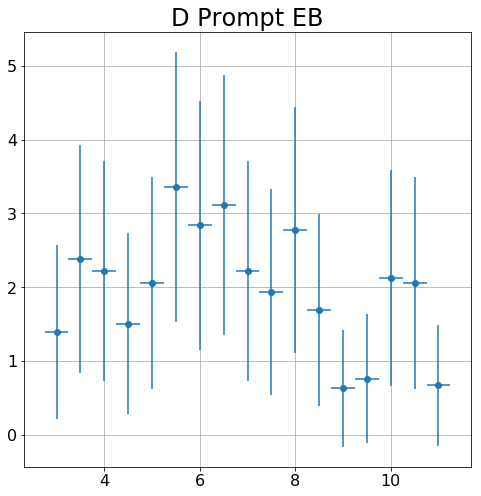

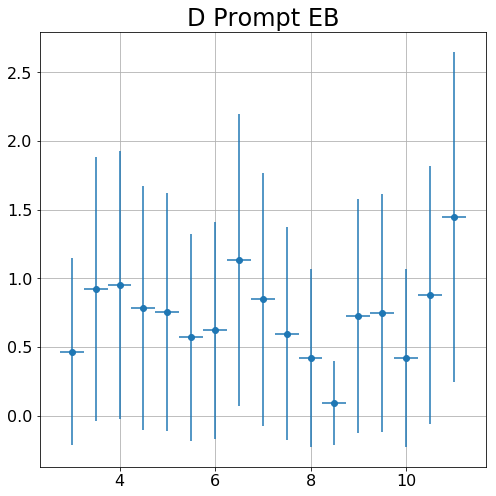

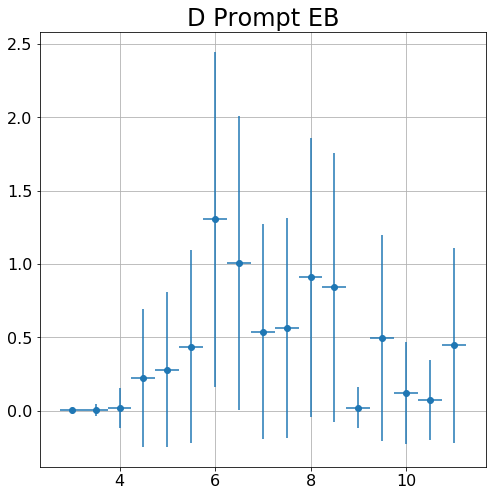

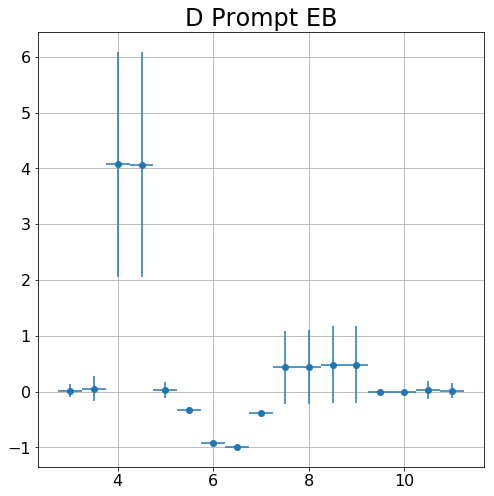

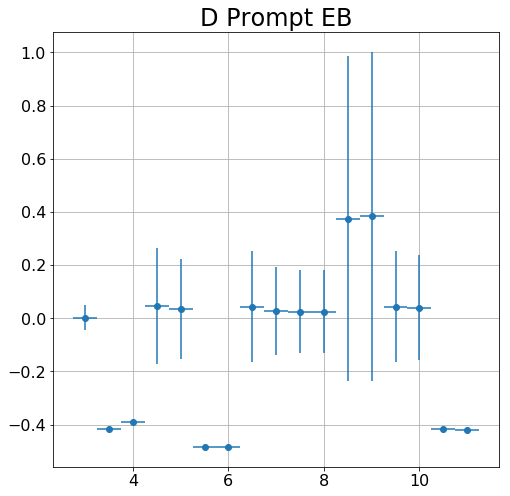

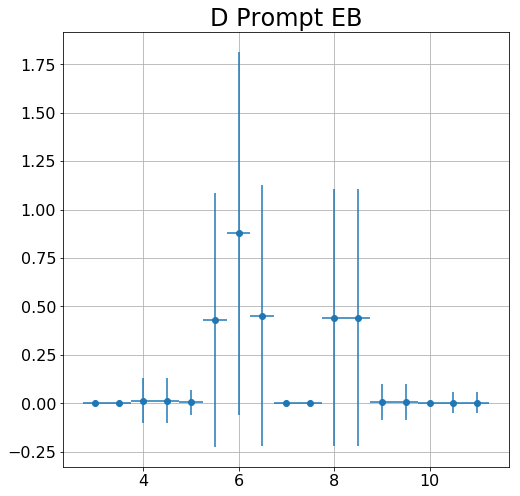

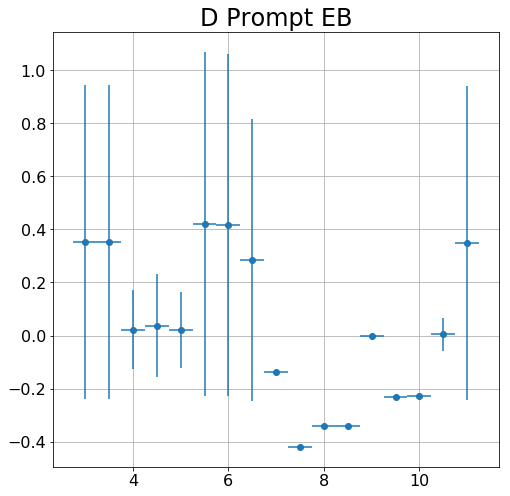

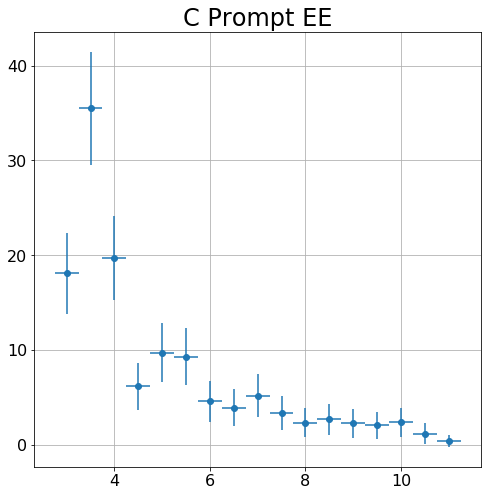

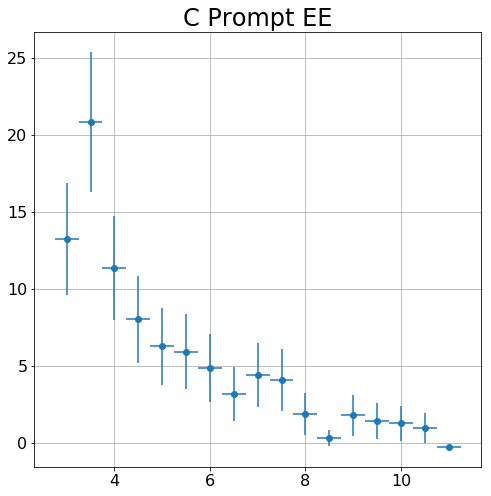

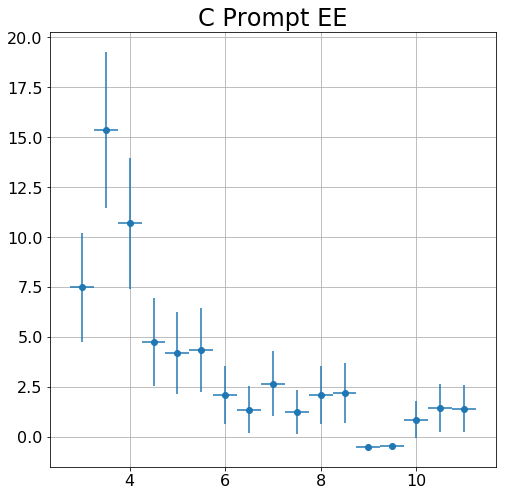

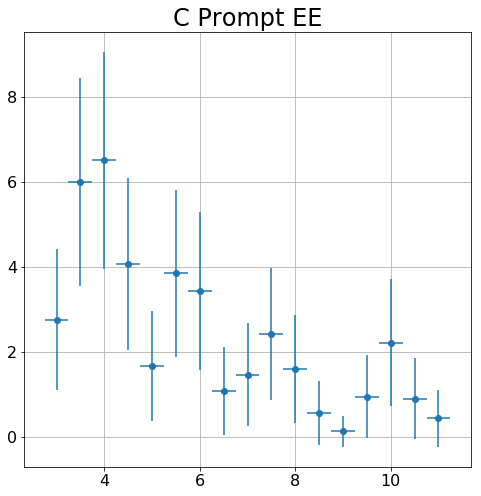

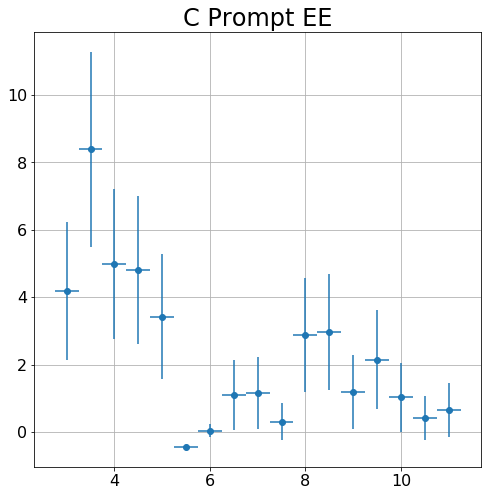

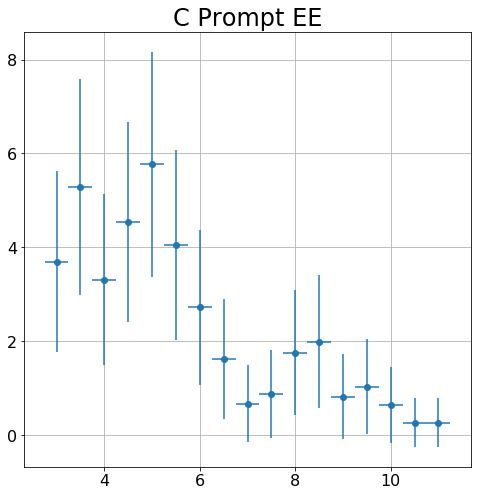

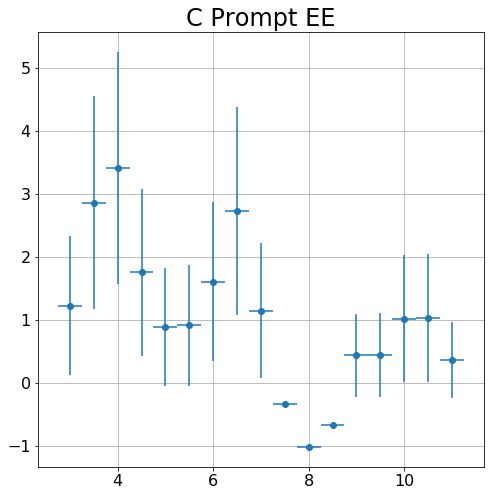

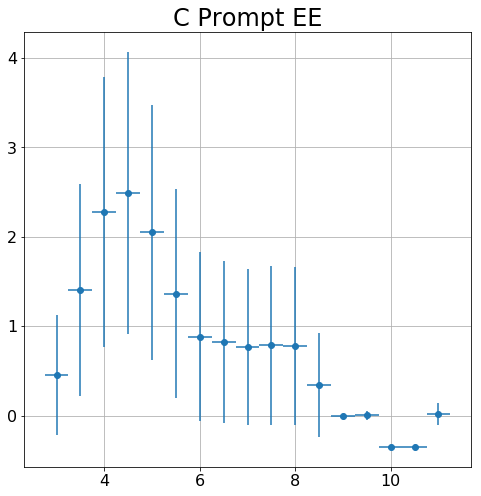

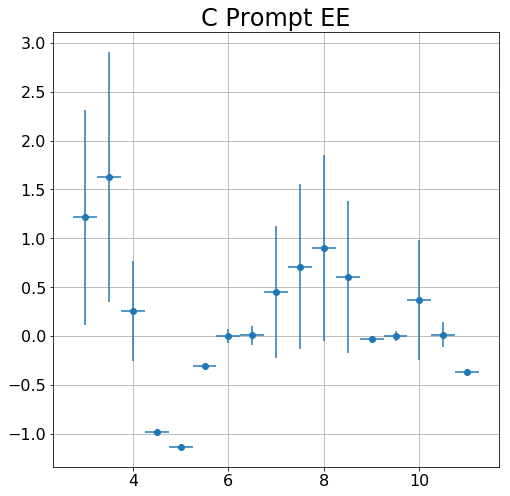

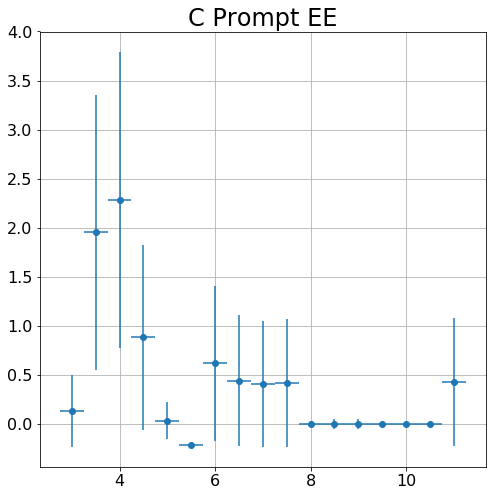

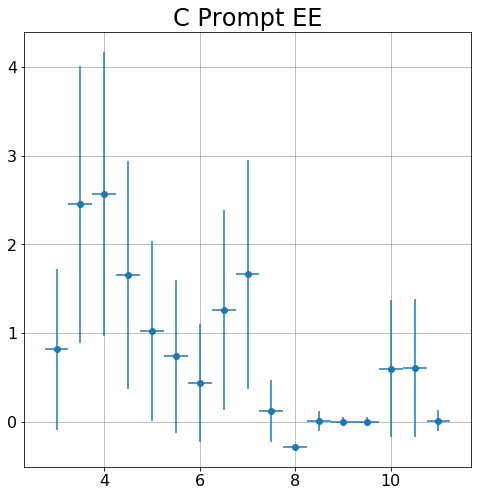

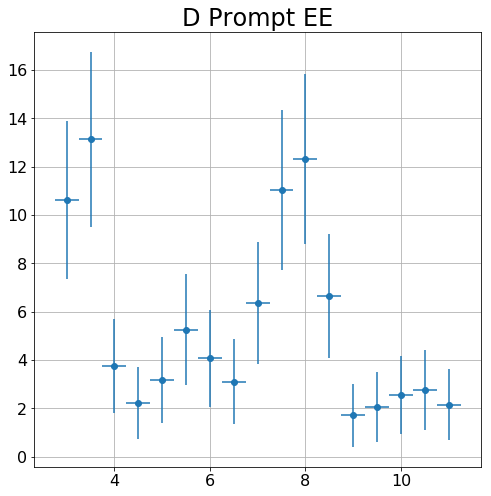

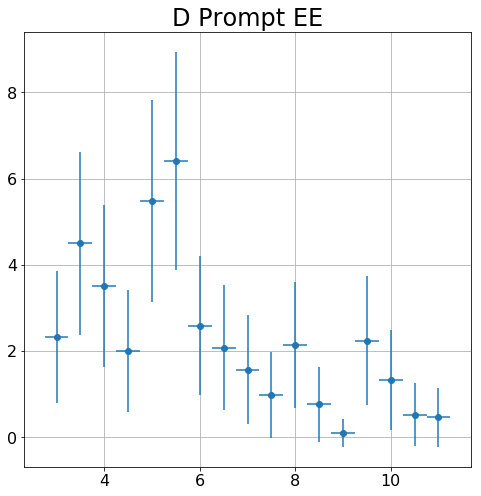

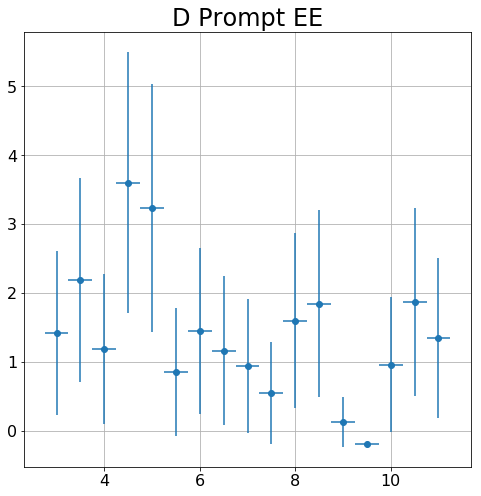

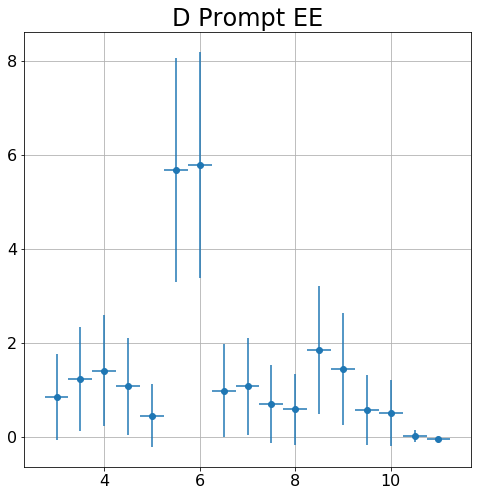

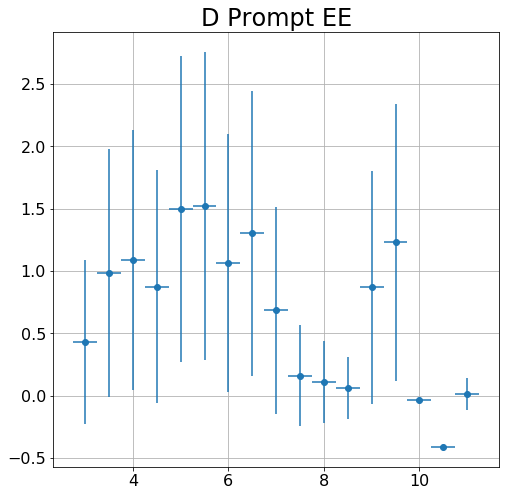

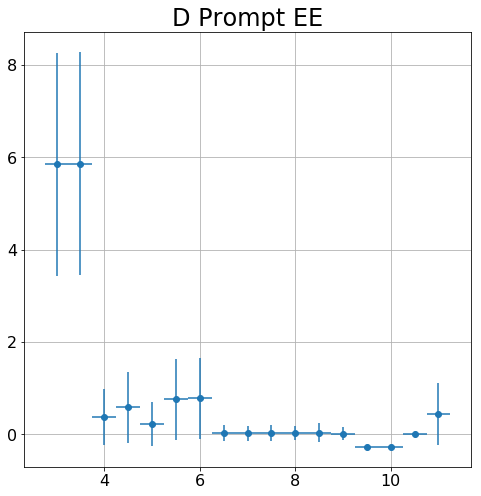

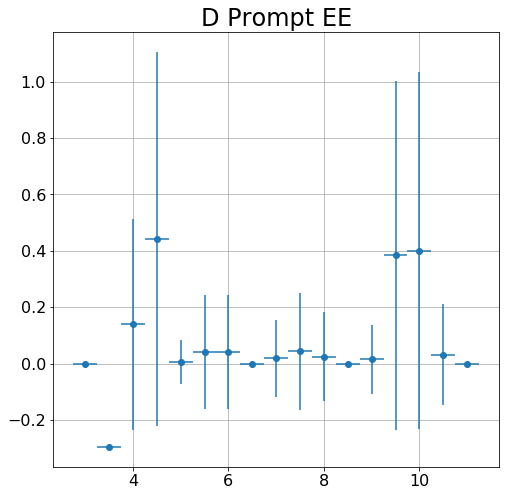

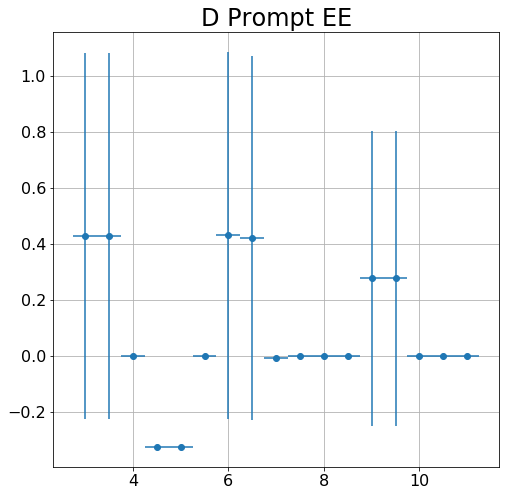

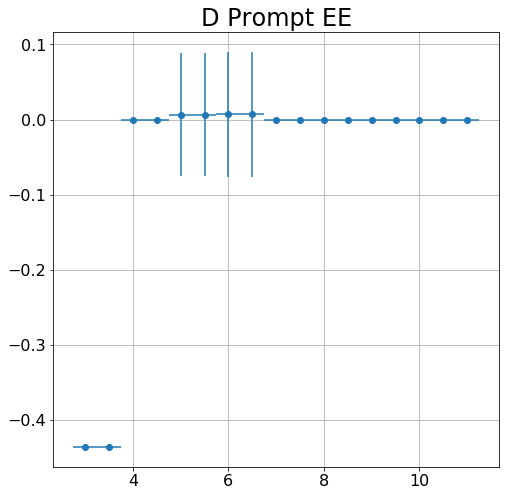

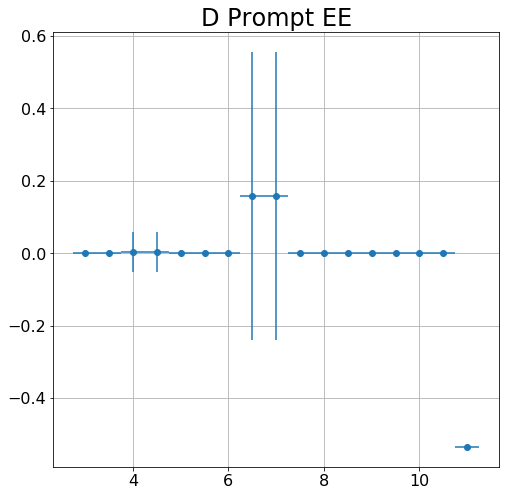

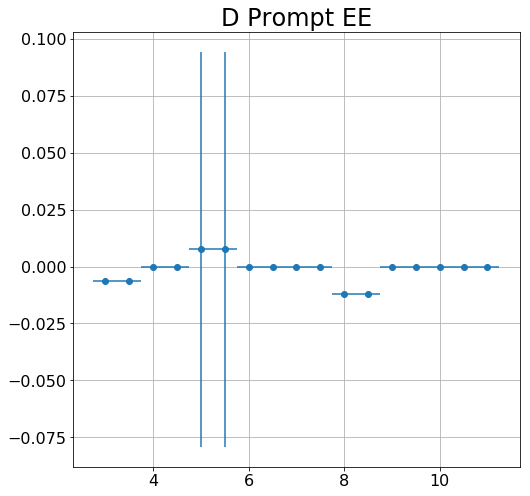

In [123]:
PlotIch_Prompt(part,var,ph,
               Bins = Bins, Yield= PromptYield,
               ichRange=[ichLow,ichHigh],step=step,
               SingleVar = SingleVar, varTarget=varTarget,
               )

# Getting the fraction for the entire range, no varS bins

In [124]:
part = ''
var = ''
ph = ''

SingleVar = False
varTarget = ''

In [125]:
fracExtrapol,fracExtrapolErr,PromptYield,NonPromptYield = GetABCDBkg_Extrapol(  part = part,var = var,ph = ph,
                                                                                Bins = Bins, Names = PromptNames,
                                                                                ichRange = [ichLow,ichHigh], step = step,
                                                                                SingleVar = SingleVar, varTarget = '',
                                                                                Print = Print,
                                                                               )

----  -----
[0, 1.4666]
----
[1.4666, 2.5]
----


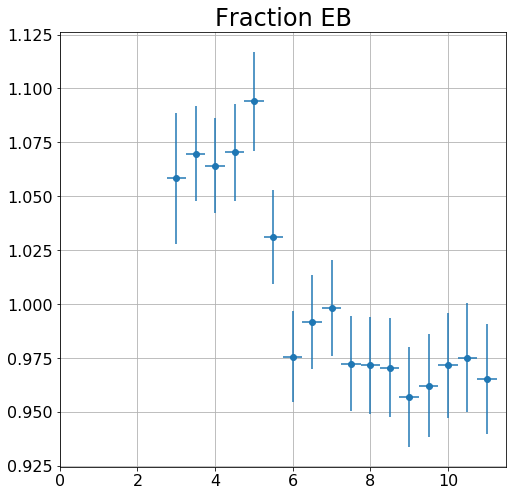

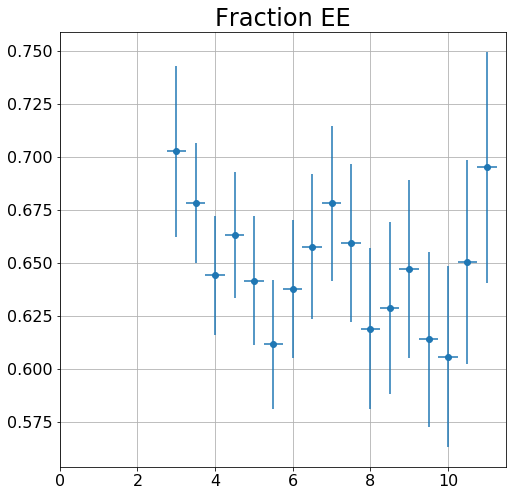

In [126]:
PlotIch(part = '',var = '',ph = '',
        Bins = Bins,
        frac=fracExtrapol, fracErr= fracExtrapolErr,
        ichRange=[ichLow,ichHigh],step=step,
        SingleVar = SingleVar, varTarget = varTarget,
       )

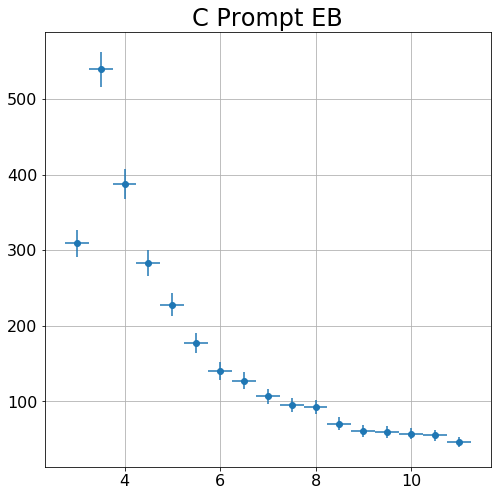

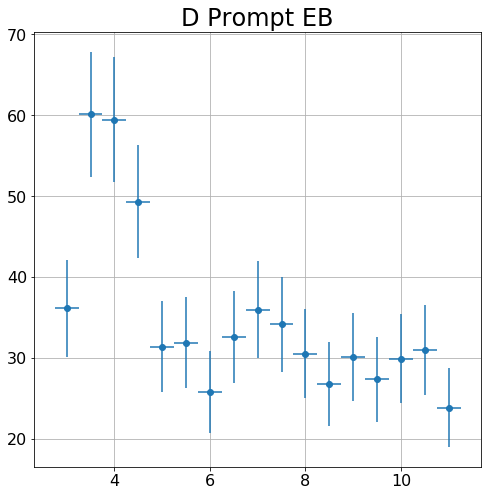

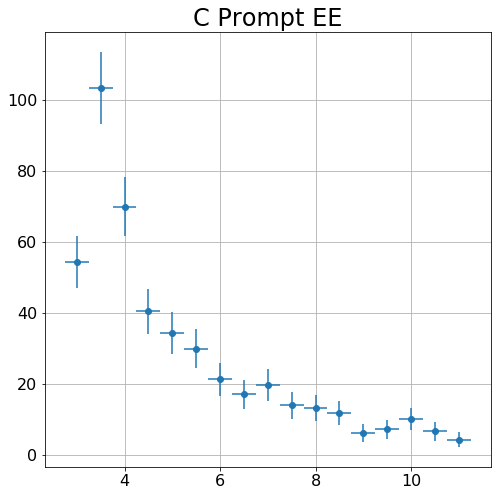

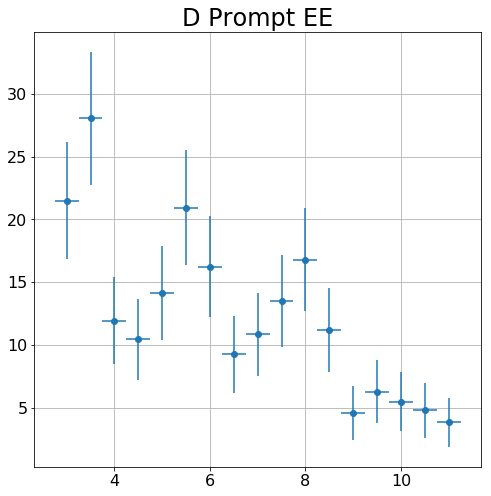

In [127]:
PlotIch_Prompt(part = '',var = '',ph = '',
               Bins = Bins, Yield= PromptYield,
               ichRange=[ichLow,ichHigh],step=step,
               SingleVar = SingleVar, varTarget = varTarget,
               )